# Mini Project2
## 데이터 분석 - EDA
### Walmart Dataset - Retail (kaggle)
###  - Historical sales data of the walmart store

https://www.kaggle.com/datasets/rutuspatel/walmart-dataset-retail

### 라이브러리

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [ ]:
!pip install koreanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

### 데이터 전처리

In [ ]:
# 파일 경로
file_path = "https://raw.githubusercontent.com/LimSeungMin/AIS8_task/main/Walmart_Store_sales.csv"

In [ ]:
# 데이터 확인
df = pd.read_csv(file_path)
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [ ]:
# 데이터 결측치 확인
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [ ]:
# 데이터 중복 확인
print(df.shape)             # 원본 데이터
df = df.drop_duplicates()
print(df.shape)             # 중복 제거 후 데이터, 중복 내용 없음
df

(6435, 8)
(6435, 8)


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [ ]:
# 컬럼명 한글화
kor = {
    'Store' : '매장번호',
    'Date' : '판매날짜',
    'Weekly_Sales' : '주간매출',
    'Holiday_Flag' : '휴일유무',
    'Temperature' : '기온',
    'Fuel_Price' : '연료비',
    'CPI' : '소비자물가지수',
    'Unemployment' : '실업률'
}

df.rename(columns=kor, inplace=True)

In [ ]:
# 화씨 -> 섭씨 변경
df['섭씨'] = (df['기온'] - 32) * 5/9

In [ ]:
# 소수점 정리
df[['주간매출', '연료비', '소비자물가지수', '실업률', '섭씨']] = round(df[['주간매출', '연료비', '소비자물가지수', '실업률', '섭씨']], 2)

In [ ]:
# 휴일유무 데이터 변경 (1, 0) -> (유, 무)
df.loc[df['휴일유무']==1, '공휴일'] = '유'
df.loc[df['휴일유무']==0, '공휴일'] = '무'

In [ ]:
# 판매날짜 데이터 타입 변경 & 파생 변수 추가
df['판매날짜'] = pd.to_datetime(df['판매날짜'])

df['연도'] = df['판매날짜'].dt.year
df['월'] = df['판매날짜'].dt.month
df['일'] = df['판매날짜'].dt.day

In [ ]:
# 컬럼명 확인
df.columns

Index(['매장번호', '판매날짜', '주간매출', '휴일유무', '기온', '연료비', '소비자물가지수', '실업률', '섭씨',
       '공휴일', '연도', '월', '일'],
      dtype='object')

In [ ]:
# 컬럼명 변경
df = df[['매장번호', '판매날짜', '연도', '월', '일', '주간매출', '공휴일', '섭씨', '연료비', '소비자물가지수', '실업률']]
df = df.rename(columns={'섭씨':'기온'})

In [ ]:
# 데이터 확인
df

,매장번호,판매날짜,연도,월,일,주간매출,공휴일,기온,연료비,소비자물가지수,실업률
0,1,2010-05-02,2010,5,2,1643690.90,무,5.73,2.57,211.10,8.11
1,1,2010-12-02,2010,12,2,1641957.44,유,3.62,2.55,211.24,8.11
2,1,2010-02-19,2010,2,19,1611968.17,무,4.41,2.51,211.29,8.11
3,1,2010-02-26,2010,2,26,1409727.59,무,8.13,2.56,211.32,8.11
4,1,2010-05-03,2010,5,3,1554806.68,무,8.06,2.62,211.35,8.11
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,2012,9,28,713173.95,무,18.27,4.00,192.01,8.68
6431,45,2012-05-10,2012,5,10,733455.07,무,18.27,3.98,192.17,8.67
6432,45,2012-12-10,2012,12,10,734464.36,무,12.48,4.00,192.33,8.67
6433,45,2012-10-19,2012,10,19,718125.53,무,13.59,3.97,192.33,8.67


In [ ]:
# 조회기간 정렬
df['판매날짜'].sort_values()

606    2010-01-10
2036   2010-01-10
5897   2010-01-10
4610   2010-01-10
5039   2010-01-10
          ...    
5860   2012-12-10
2285   2012-12-10
1427   2012-12-10
3572   2012-12-10
283    2012-12-10
Name: 판매날짜, Length: 6435, dtype: datetime64[ns]

조회기간 : 2010-01-10 ~ 2012-12-10

## 1. 매출이 가장 많은 매장

In [ ]:
sales_max = pd.pivot_table(data=df, index='매장번호', values='주간매출', aggfunc='sum')
sales_max

,주간매출
매장번호,
1,2.224028e+08
2,2.753824e+08
3,5.758674e+07
4,2.995440e+08
5,4.547569e+07
6,2.237561e+08
7,8.159828e+07
8,1.299512e+08
9,7.778922e+07


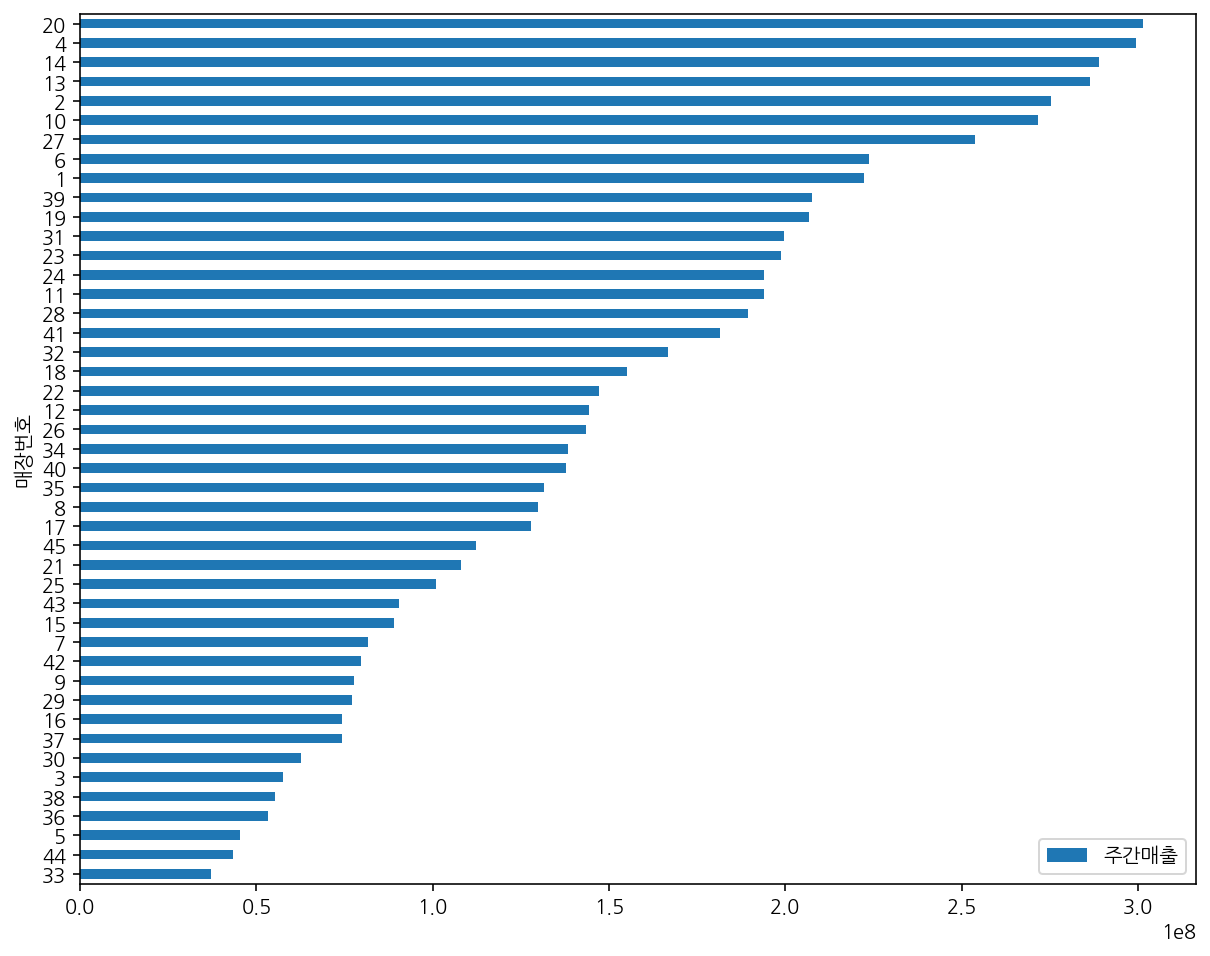

In [ ]:
# 막대그래프로 표현
sales_max.sort_values('주간매출').plot.barh(figsize=(10,8));

In [ ]:
round(sales_max,0).astype(int).style.bar()

,주간매출
매장번호,
1,222402809
2,275382441
3,57586735
4,299543953
5,45475689
6,223756131
7,81598275
8,129951181
9,77789219


# 2. 매출이 가장 적은 매장

In [ ]:
# 매장별로 'df_매장번호' 형식으로 데이터 분리
for i in range(1, 46):
    globals()['df_{}'.format(i)] = df[df['매장번호']==i]

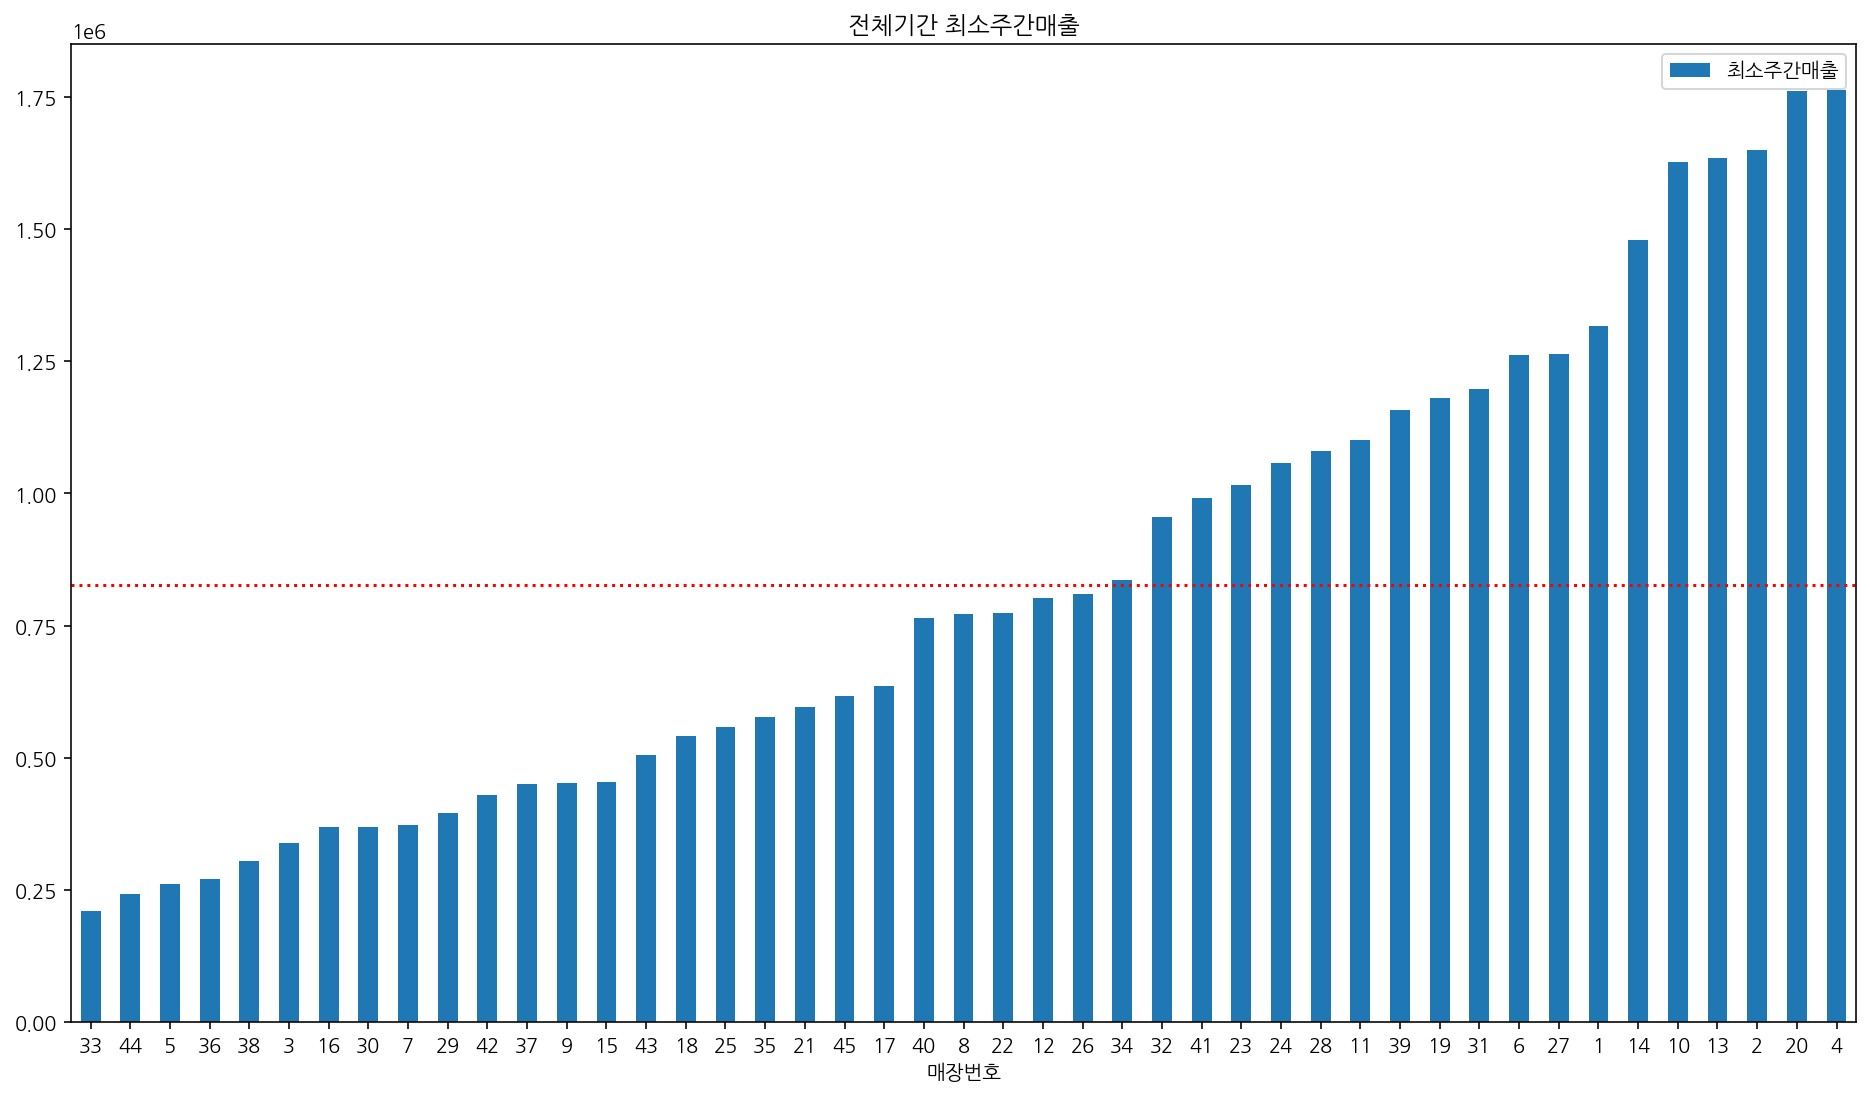

In [ ]:
# 매장별 전체 기간 최소주간매출
min_totalweeksales_list = []
for i in range(1, 46):
    min_totalweeksales_list.append([i, min(globals()['df_{}'.format(i)]['주간매출'])])

min_totalweeksales_df = pd.DataFrame(min_totalweeksales_list)
min_totalweeksales_df.rename(columns = {0:'매장번호', 1:'최소주간매출'}, inplace=True)
min_totalweeksales = min_totalweeksales_df.set_index('매장번호')

min_totalweeksales.sort_values(by='최소주간매출').plot(kind='bar', figsize=(16, 9), rot=0, title='전체기간 최소주간매출');
plt.axhline(np.average(min_totalweeksales['최소주간매출']), color='red', ls=':');

In [ ]:
# 전체기간 최소주간매출이 많이 발생한 연도
df.loc[df['주간매출'].isin(min_totalweeksales['최소주간매출']), ['매장번호', '주간매출', '연도']].set_index('매장번호')['연도'].value_counts()

2011    23
2010    15
2012     7
Name: 연도, dtype: int64

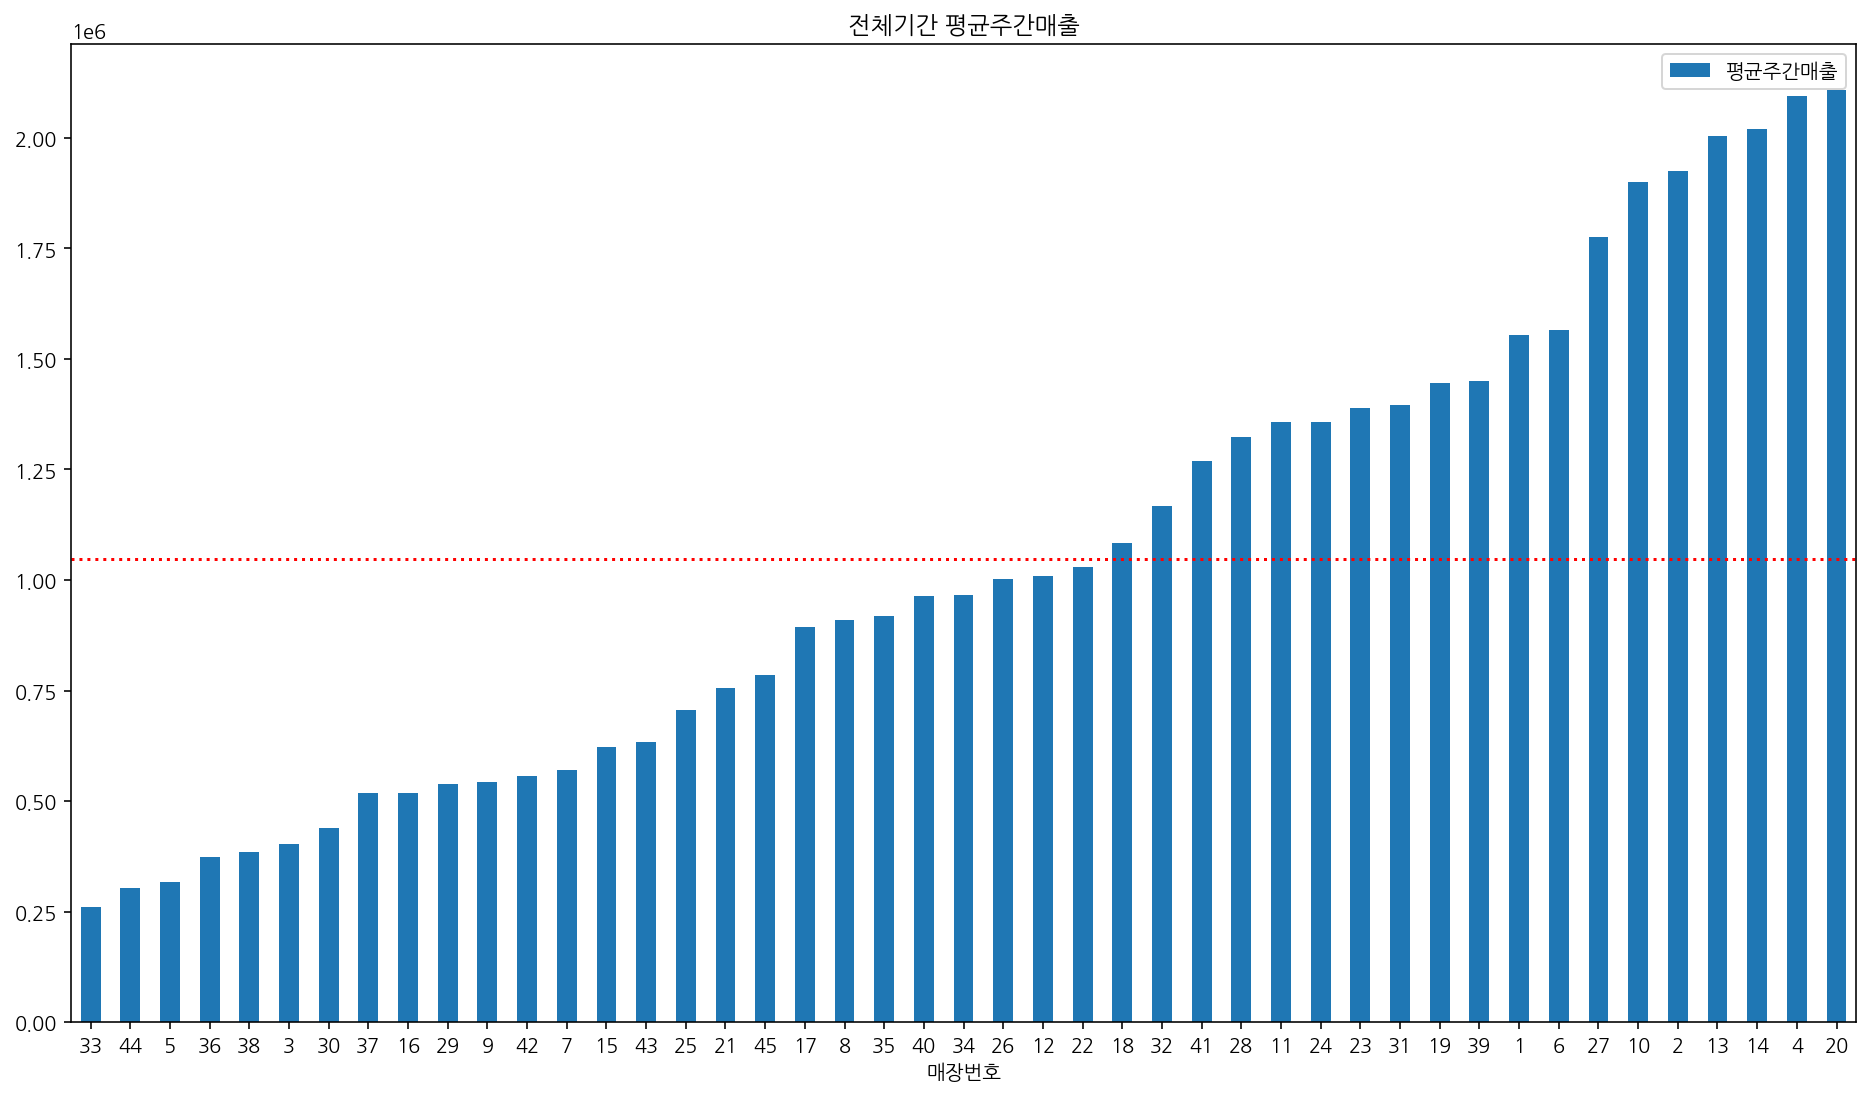

In [ ]:
# 전체기간 평균주간매출
avg_totalweeksales_list = []
for i in range(1, 46):
    avg_totalweeksales_list.append([i, round(np.average(globals()['df_{}'.format(i)]['주간매출']), 2)])

avg_totalweeksales_df = pd.DataFrame(avg_totalweeksales_list)
avg_totalweeksales_df.rename(columns = {0:'매장번호', 1:'평균주간매출'}, inplace=True)
avg_totalweeksales = avg_totalweeksales_df.set_index('매장번호')

avg_totalweeksales.sort_values(by='평균주간매출').plot(kind='bar', figsize=(16, 9), rot=0, title='전체기간 평균주간매출');
plt.axhline(np.average(avg_totalweeksales['평균주간매출']), color='red', ls=':');

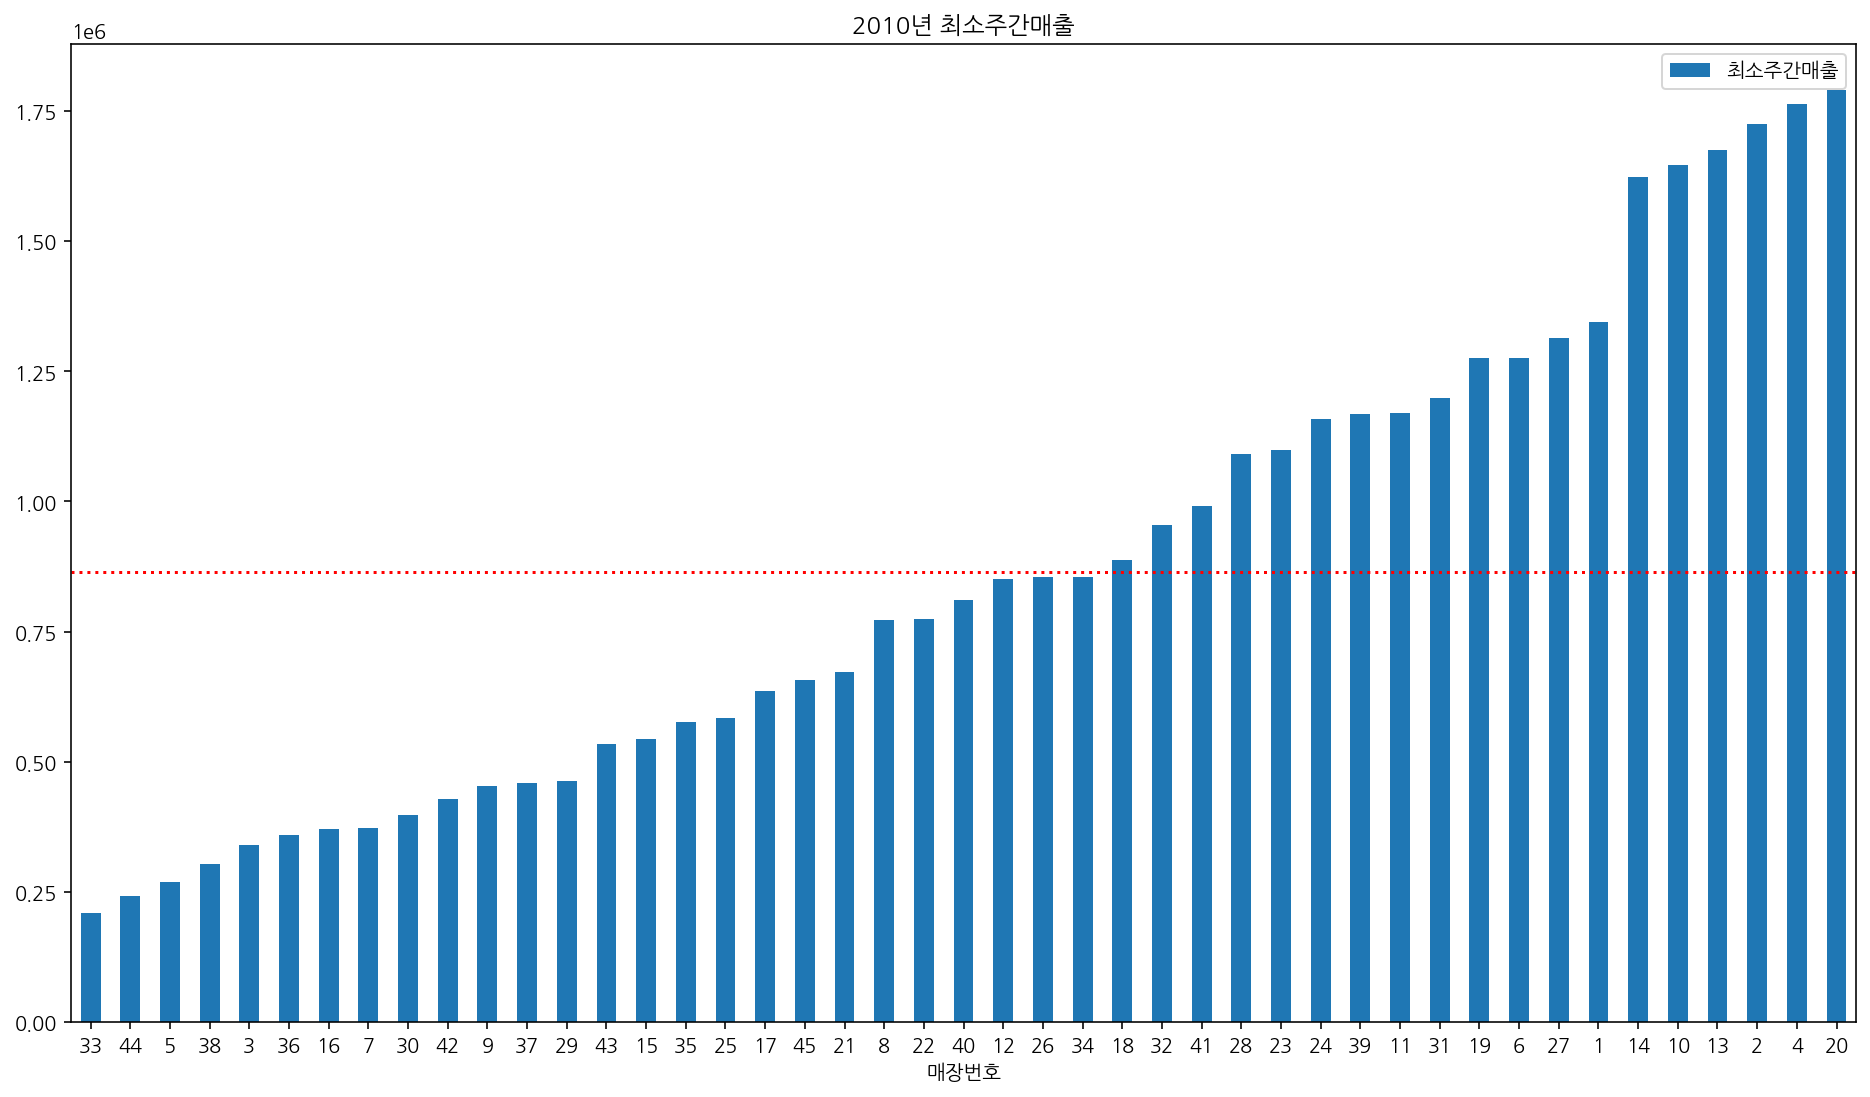

In [ ]:
# 2010년 최소주간매출
df_2010 = df[df['연도']==2010]

for i in range(1, 46):
    globals()['df_2010_{}'.format(i)] = df_2010[df_2010['매장번호']==i]

min_2010weeksales_list = []
for i in range(1, 46):
    min_2010weeksales_list.append([i, min(globals()['df_2010_{}'.format(i)]['주간매출'])])

min_2010weeksales_df = pd.DataFrame(min_2010weeksales_list)
min_2010weeksales_df.rename(columns = {0:'매장번호', 1:'최소주간매출'}, inplace=True)
min_2010weeksales = min_2010weeksales_df.set_index('매장번호')

min_2010weeksales.sort_values(by='최소주간매출').plot(kind='bar', figsize=(16, 9), rot=0, title='2010년 최소주간매출');
plt.axhline(np.average(min_2010weeksales['최소주간매출']), color='red', ls=':');

In [ ]:
# 2010년 최소주간매출이 많이 발생한 월
df_2010.loc[df_2010['주간매출'].isin(min_2010weeksales['최소주간매출']), ['매장번호', '주간매출', '월']].set_index('매장번호')['월'].value_counts()

12    20
9      7
3      4
2      4
10     2
8      2
5      2
1      2
7      1
4      1
Name: 월, dtype: int64

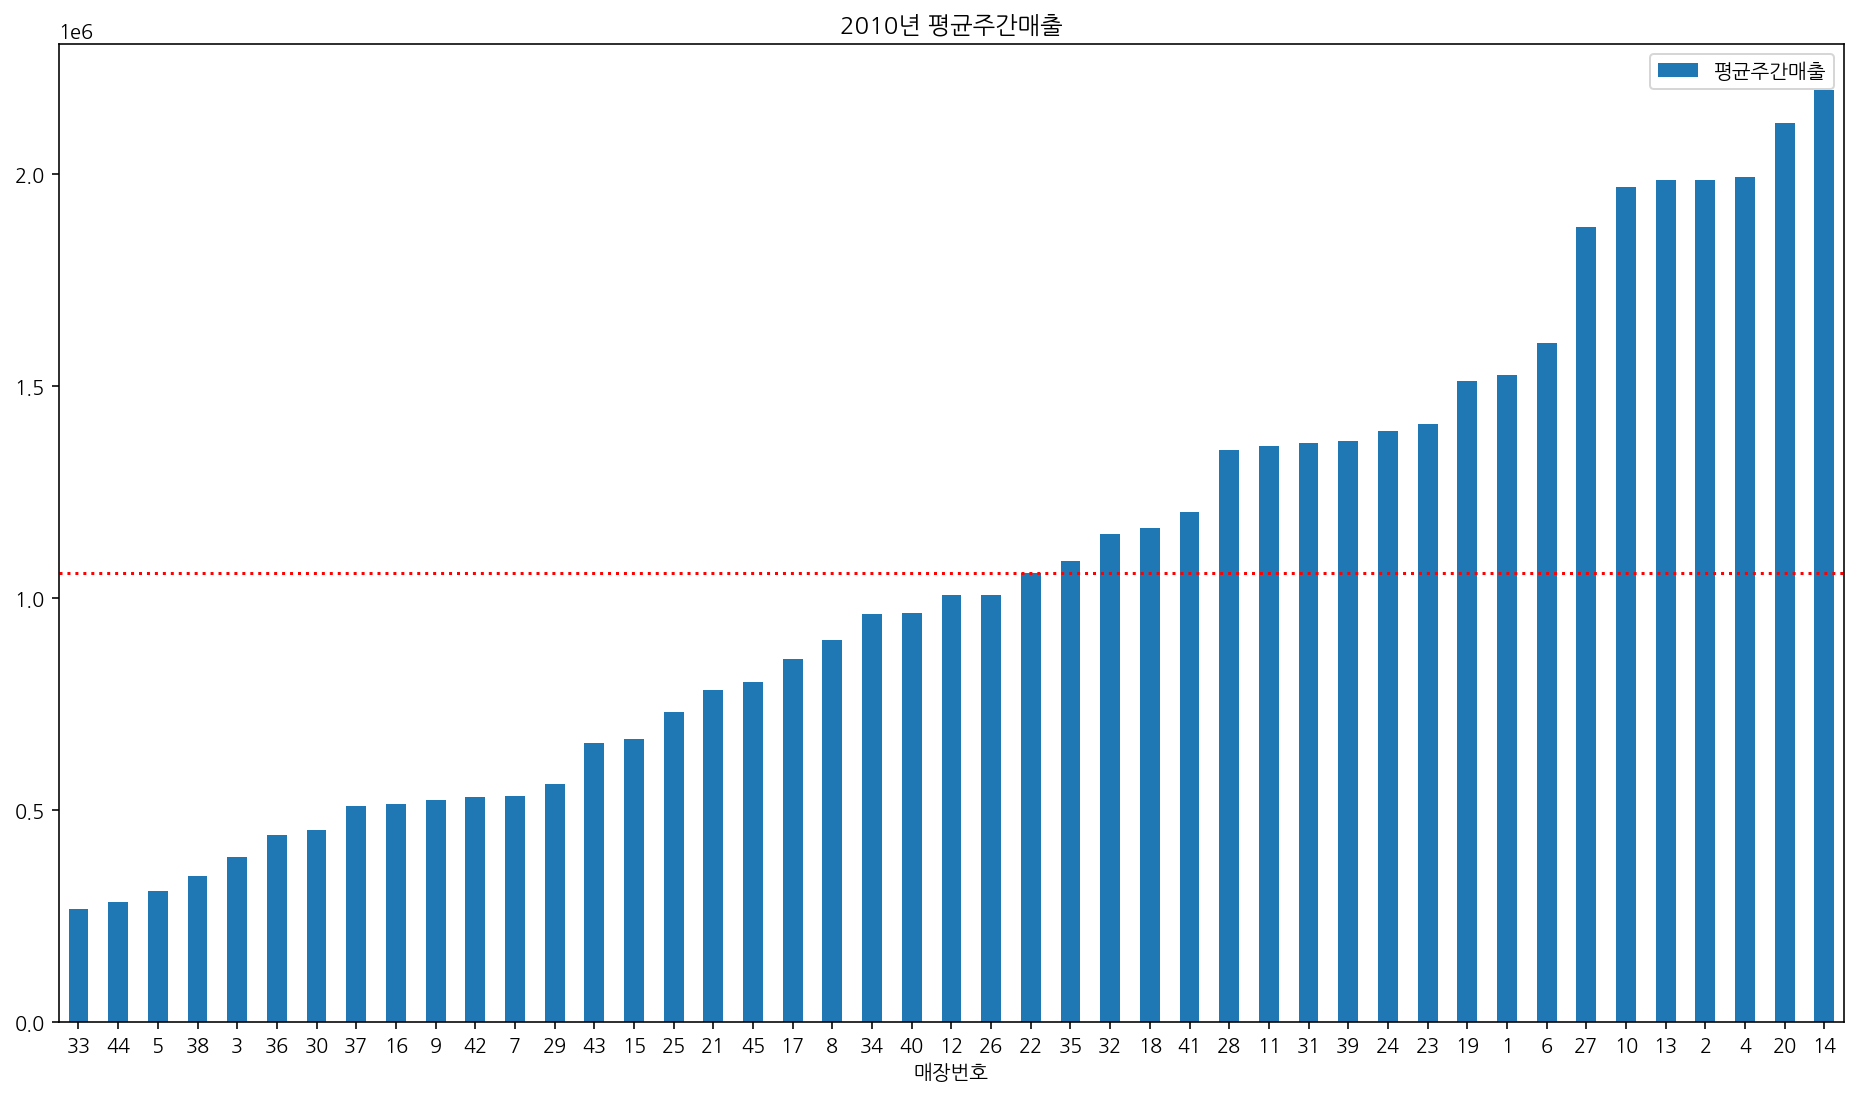

In [ ]:
# 2010년 평균주간매출
avg_2010weeksales_list = []
for i in range(1, 46):
    avg_2010weeksales_list.append([i, round(np.average(globals()['df_2010_{}'.format(i)]['주간매출']), 2)])

avg_2010weeksales_df = pd.DataFrame(avg_2010weeksales_list)
avg_2010weeksales_df.rename(columns = {0:'매장번호', 1:'평균주간매출'}, inplace=True)
avg_2010weeksales = avg_2010weeksales_df.set_index('매장번호')

avg_2010weeksales.sort_values(by='평균주간매출').plot(kind='bar', figsize=(16, 9), rot=0, title='2010년 평균주간매출');
plt.axhline(np.average(avg_2010weeksales['평균주간매출']), color='red', ls=':');

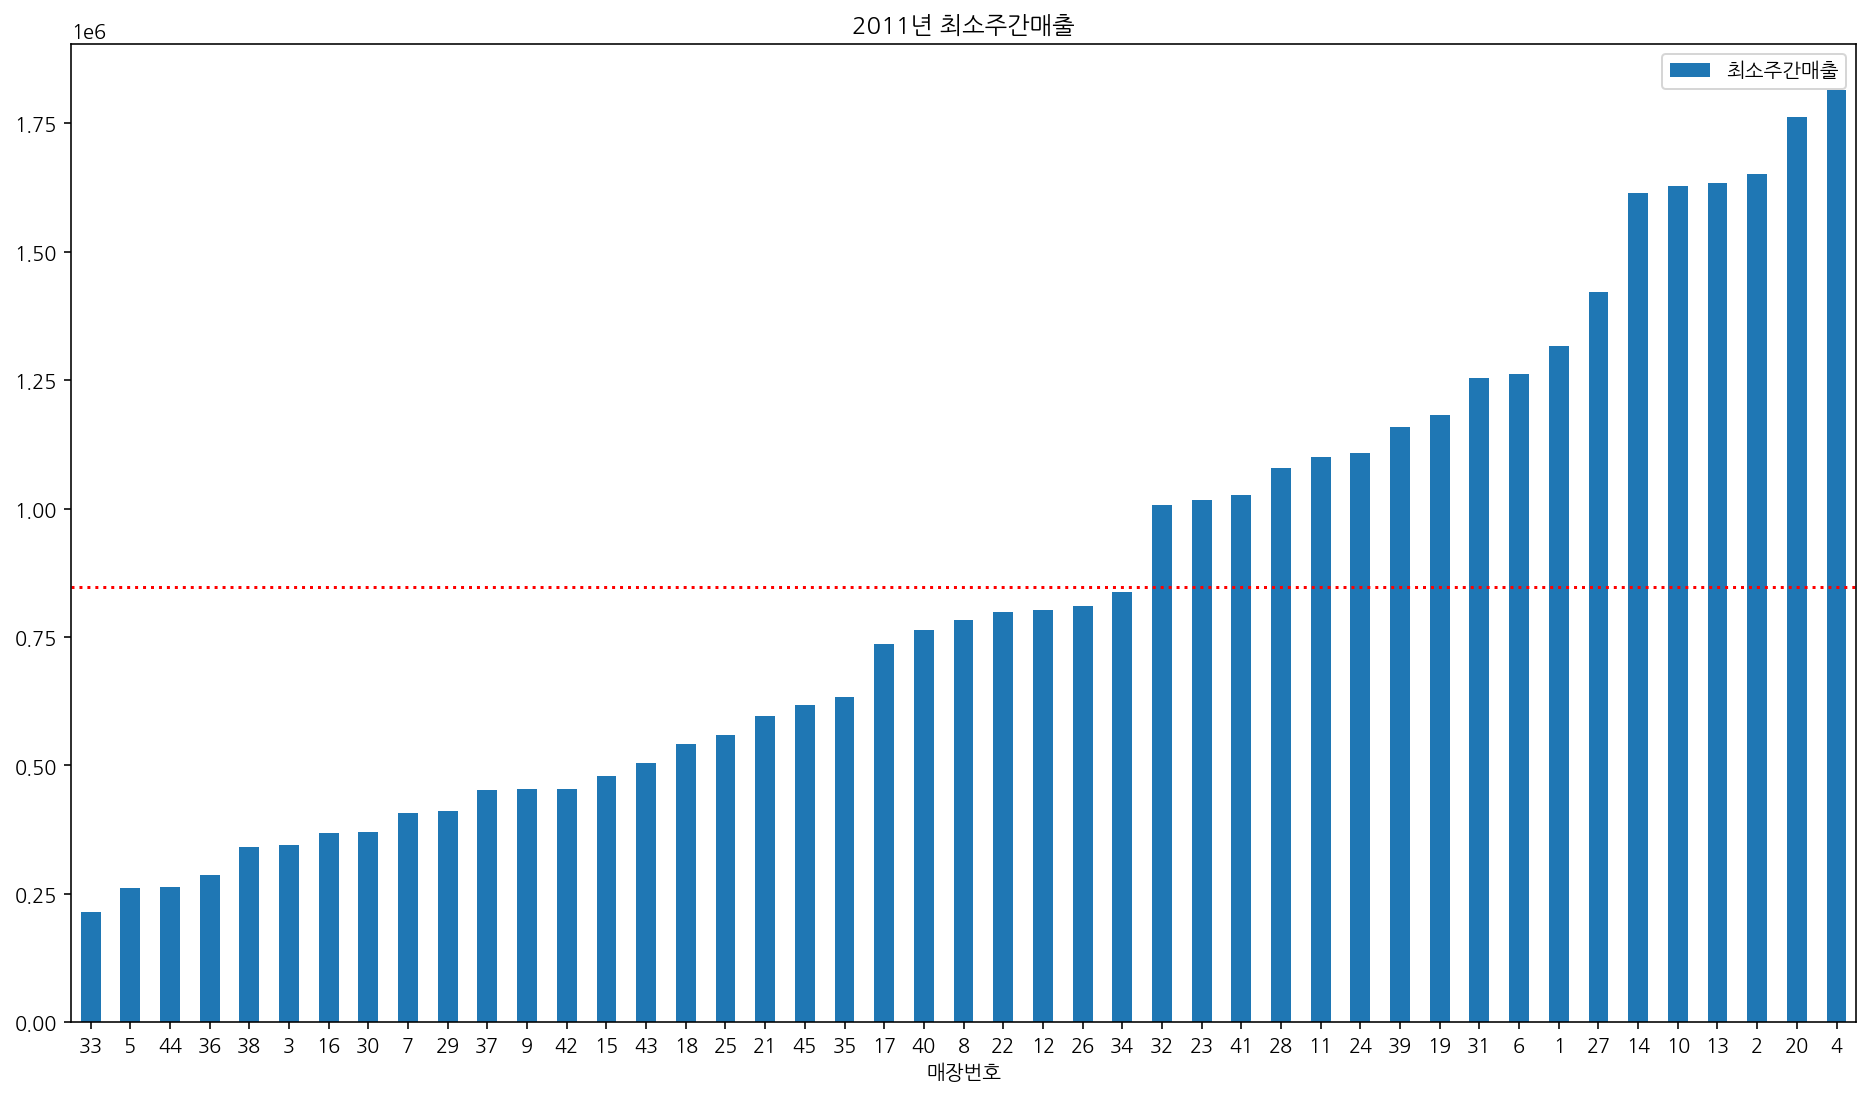

In [ ]:
# 2011년 최소주간매출
df_2011 = df[df['연도']==2011]

for i in range(1, 46):
    globals()['df_2011_{}'.format(i)] = df_2011[df_2011['매장번호']==i]

min_2011weeksales_list = []
for i in range(1, 46):
    min_2011weeksales_list.append([i, min(globals()['df_2011_{}'.format(i)]['주간매출'])])

min_2011weeksales_df = pd.DataFrame(min_2011weeksales_list)
min_2011weeksales_df.rename(columns = {0:'매장번호', 1:'최소주간매출'}, inplace=True)
min_2011weeksales = min_2011weeksales_df.set_index('매장번호')

min_2011weeksales.sort_values(by='최소주간매출').plot(kind='bar', figsize=(16, 9), rot=0, title='2011년 최소주간매출');
plt.axhline(np.average(min_2011weeksales['최소주간매출']), color='red', ls=':');

In [ ]:
# 2011년 최소주간매출이 많이 발생한 월
df_2011.loc[df_2011['주간매출'].isin(min_2011weeksales['최소주간매출']), ['매장번호', '주간매출', '월']].set_index('매장번호')['월'].value_counts()

1     30
12     6
9      2
7      2
4      2
2      2
6      1
Name: 월, dtype: int64

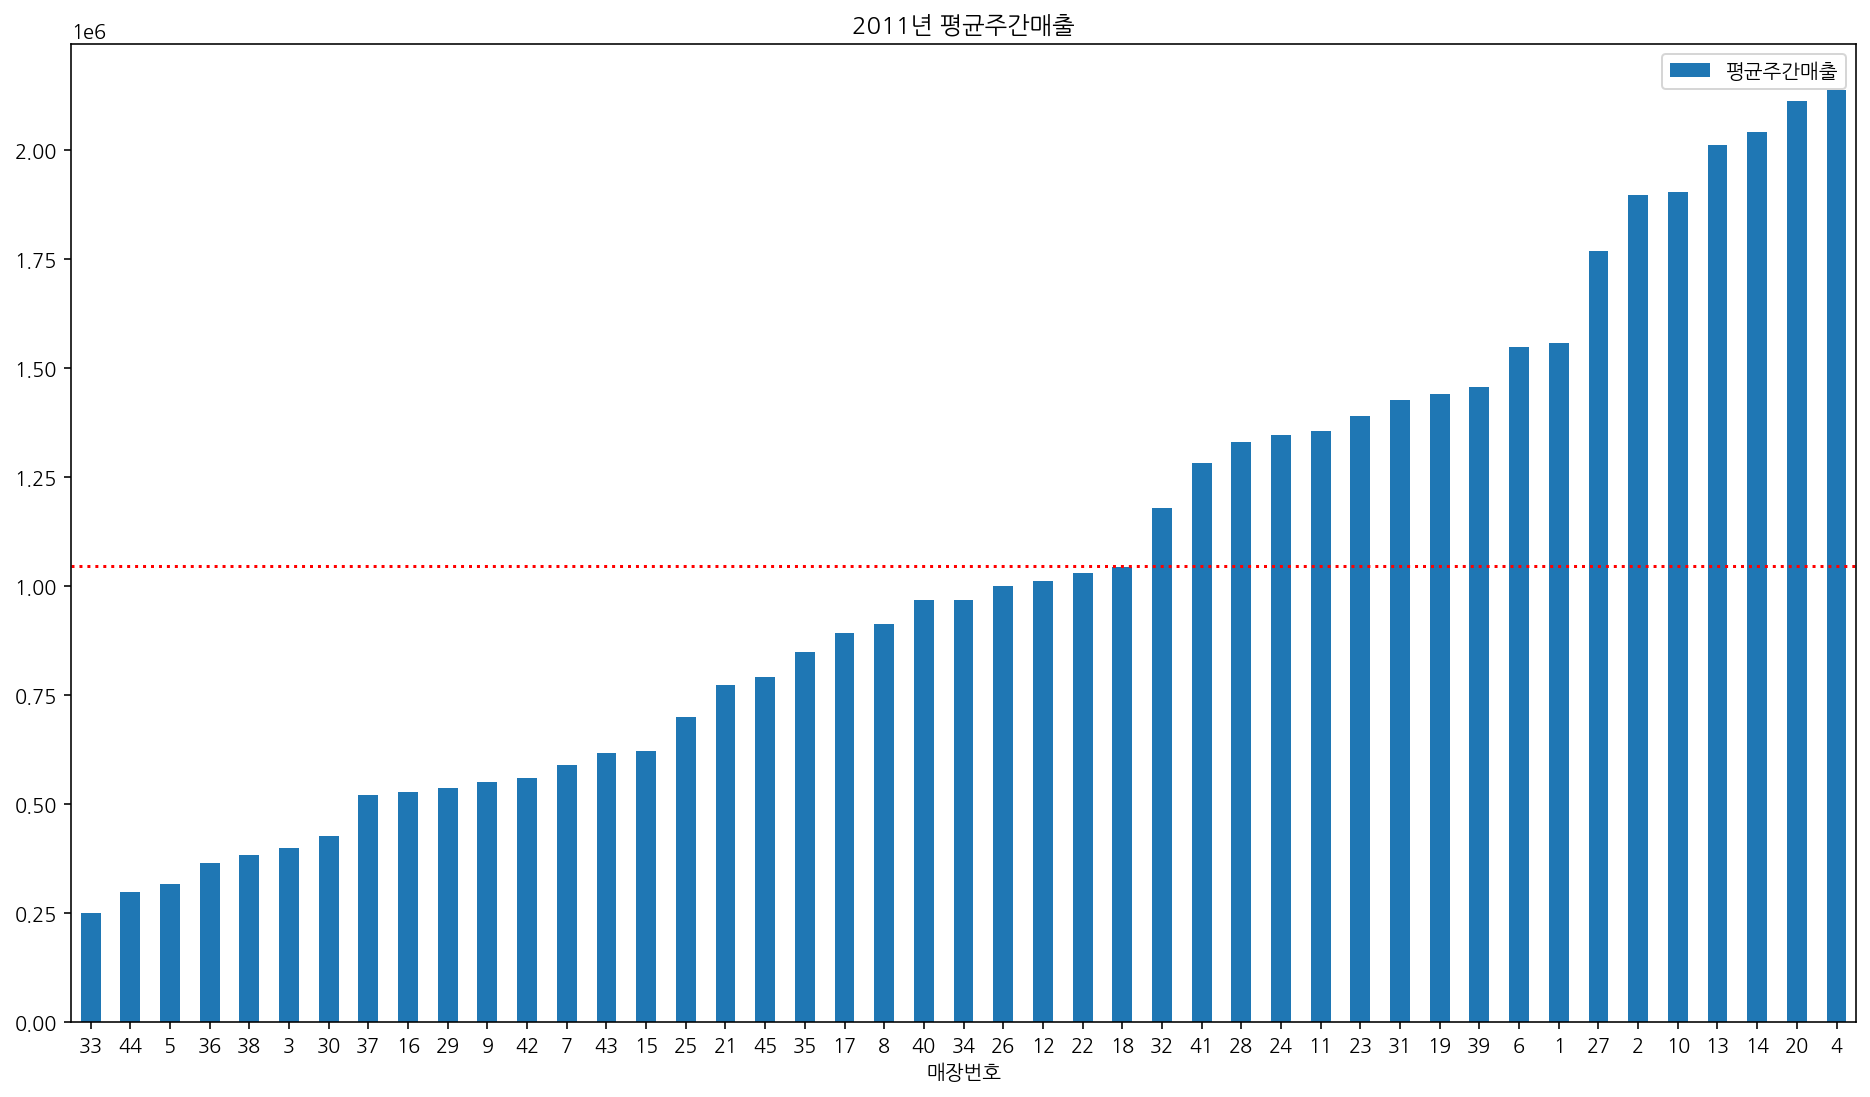

In [ ]:
# 2011년 평균주간매출
avg_2011weeksales_list = []
for i in range(1, 46):
    avg_2011weeksales_list.append([i, round(np.average(globals()['df_2011_{}'.format(i)]['주간매출']), 2)])

avg_2011weeksales_df = pd.DataFrame(avg_2011weeksales_list)
avg_2011weeksales_df.rename(columns = {0:'매장번호', 1:'평균주간매출'}, inplace=True)
avg_2011weeksales = avg_2011weeksales_df.set_index('매장번호')

avg_2011weeksales.sort_values(by='평균주간매출').plot(kind='bar', figsize=(16, 9), rot=0, title='2011년 평균주간매출');
plt.axhline(np.average(avg_2011weeksales['평균주간매출']), color='red', ls=':');

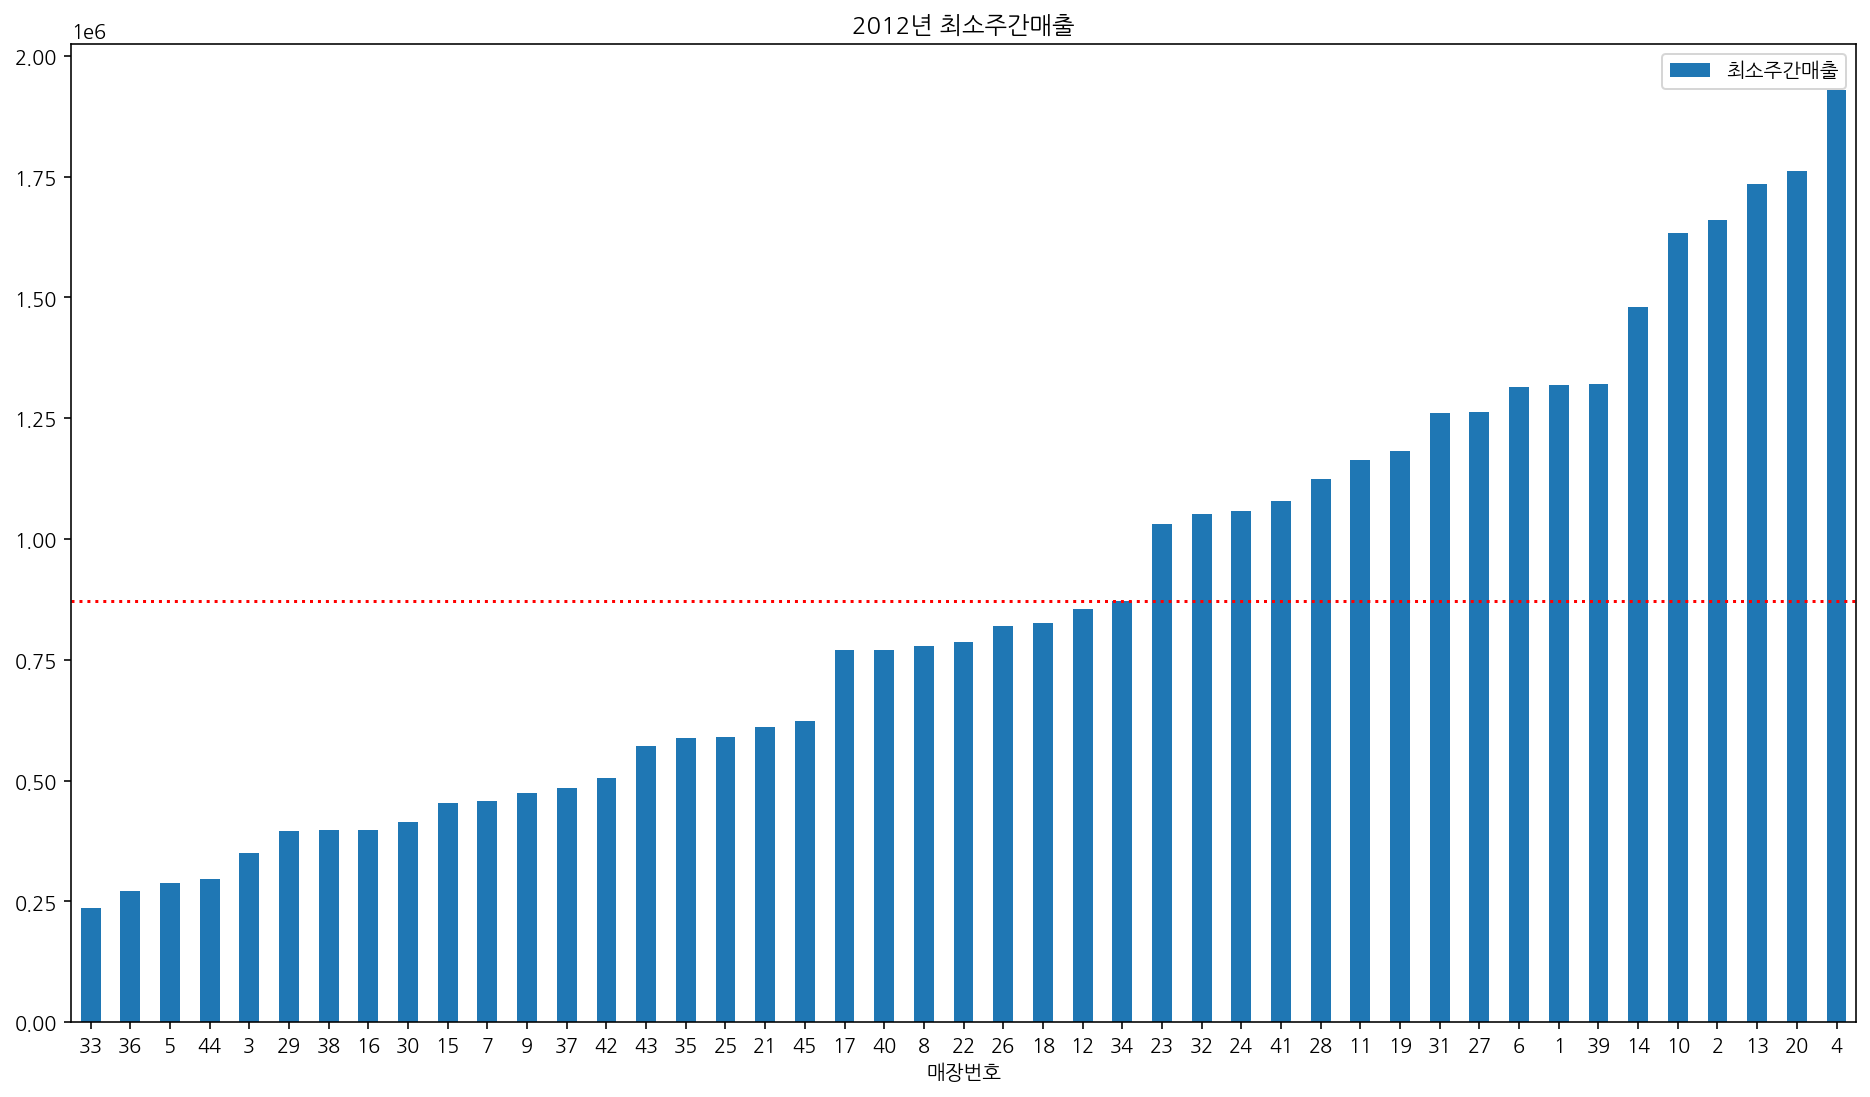

In [ ]:
# 2012년 최소주간매출
df_2012 = df[df['연도']==2012]

for i in range(1, 46):
    globals()['df_2012_{}'.format(i)] = df_2012[df_2012['매장번호']==i]

min_2012weeksales_list = []
for i in range(1, 46):
    min_2012weeksales_list.append([i, min(globals()['df_2012_{}'.format(i)]['주간매출'])])

min_2012weeksales_df = pd.DataFrame(min_2012weeksales_list)
min_2012weeksales_df.rename(columns = {0:'매장번호', 1:'최소주간매출'}, inplace=True)
min_2012weeksales = min_2012weeksales_df.set_index('매장번호')

min_2012weeksales.sort_values(by='최소주간매출').plot(kind='bar', figsize=(16, 9), rot=0, title='2012년 최소주간매출');
plt.axhline(np.average(min_2012weeksales['최소주간매출']), color='red', ls=':');

In [ ]:
# 2012년 최소주간매출이 많이 발생한 월
df_2012.loc[df_2012['주간매출'].isin(min_2012weeksales['최소주간매출']), ['매장번호', '주간매출', '월']].set_index('매장번호')['월'].value_counts()

1    34
4     2
7     2
9     2
3     2
8     2
6     1
Name: 월, dtype: int64

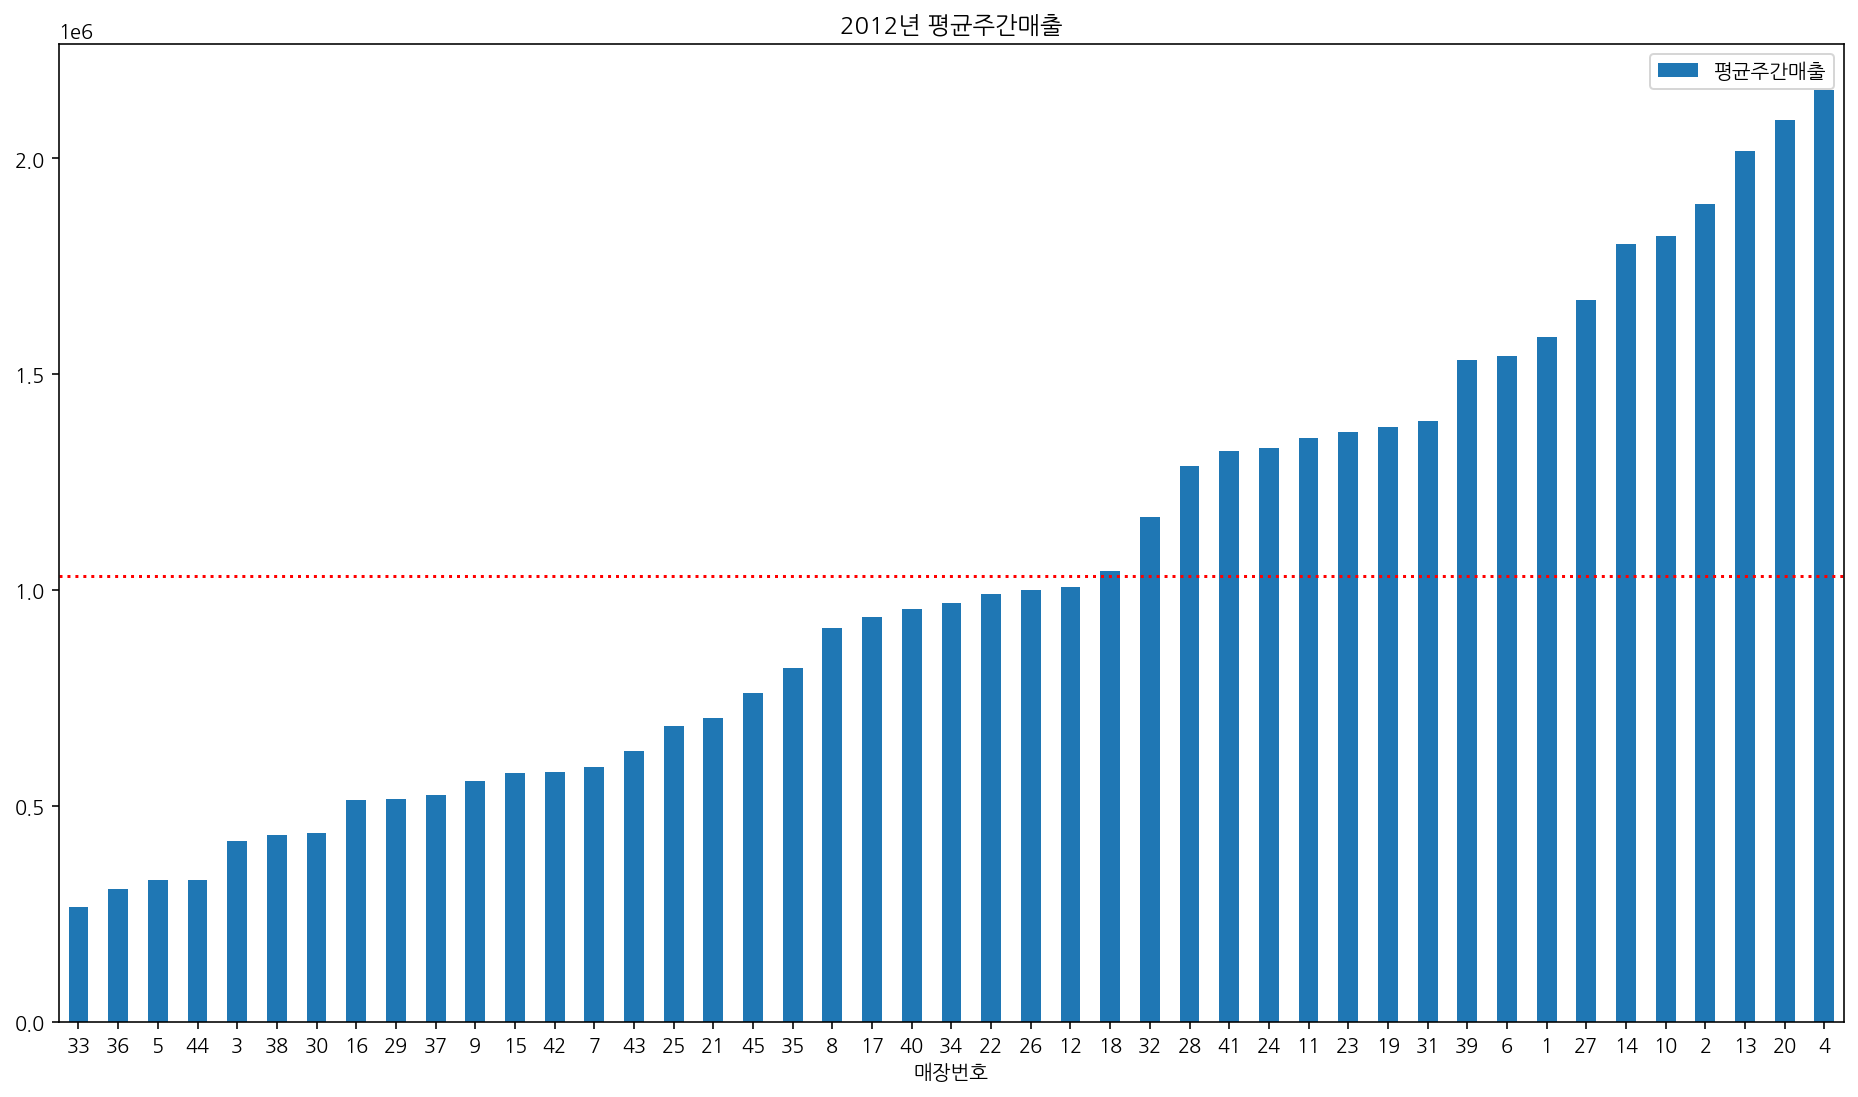

In [ ]:
# 2012년 평균주간매출
avg_2012weeksales_list = []
for i in range(1, 46):
    avg_2012weeksales_list.append([i, round(np.average(globals()['df_2012_{}'.format(i)]['주간매출']), 2)])

avg_2012weeksales_df = pd.DataFrame(avg_2012weeksales_list)
avg_2012weeksales_df.rename(columns = {0:'매장번호', 1:'평균주간매출'}, inplace=True)
avg_2012weeksales = avg_2012weeksales_df.set_index('매장번호')

avg_2012weeksales.sort_values(by='평균주간매출').plot(kind='bar', figsize=(16, 9), rot=0, title='2012년 평균주간매출');
plt.axhline(np.average(avg_2012weeksales['평균주간매출']), color='red', ls=':');

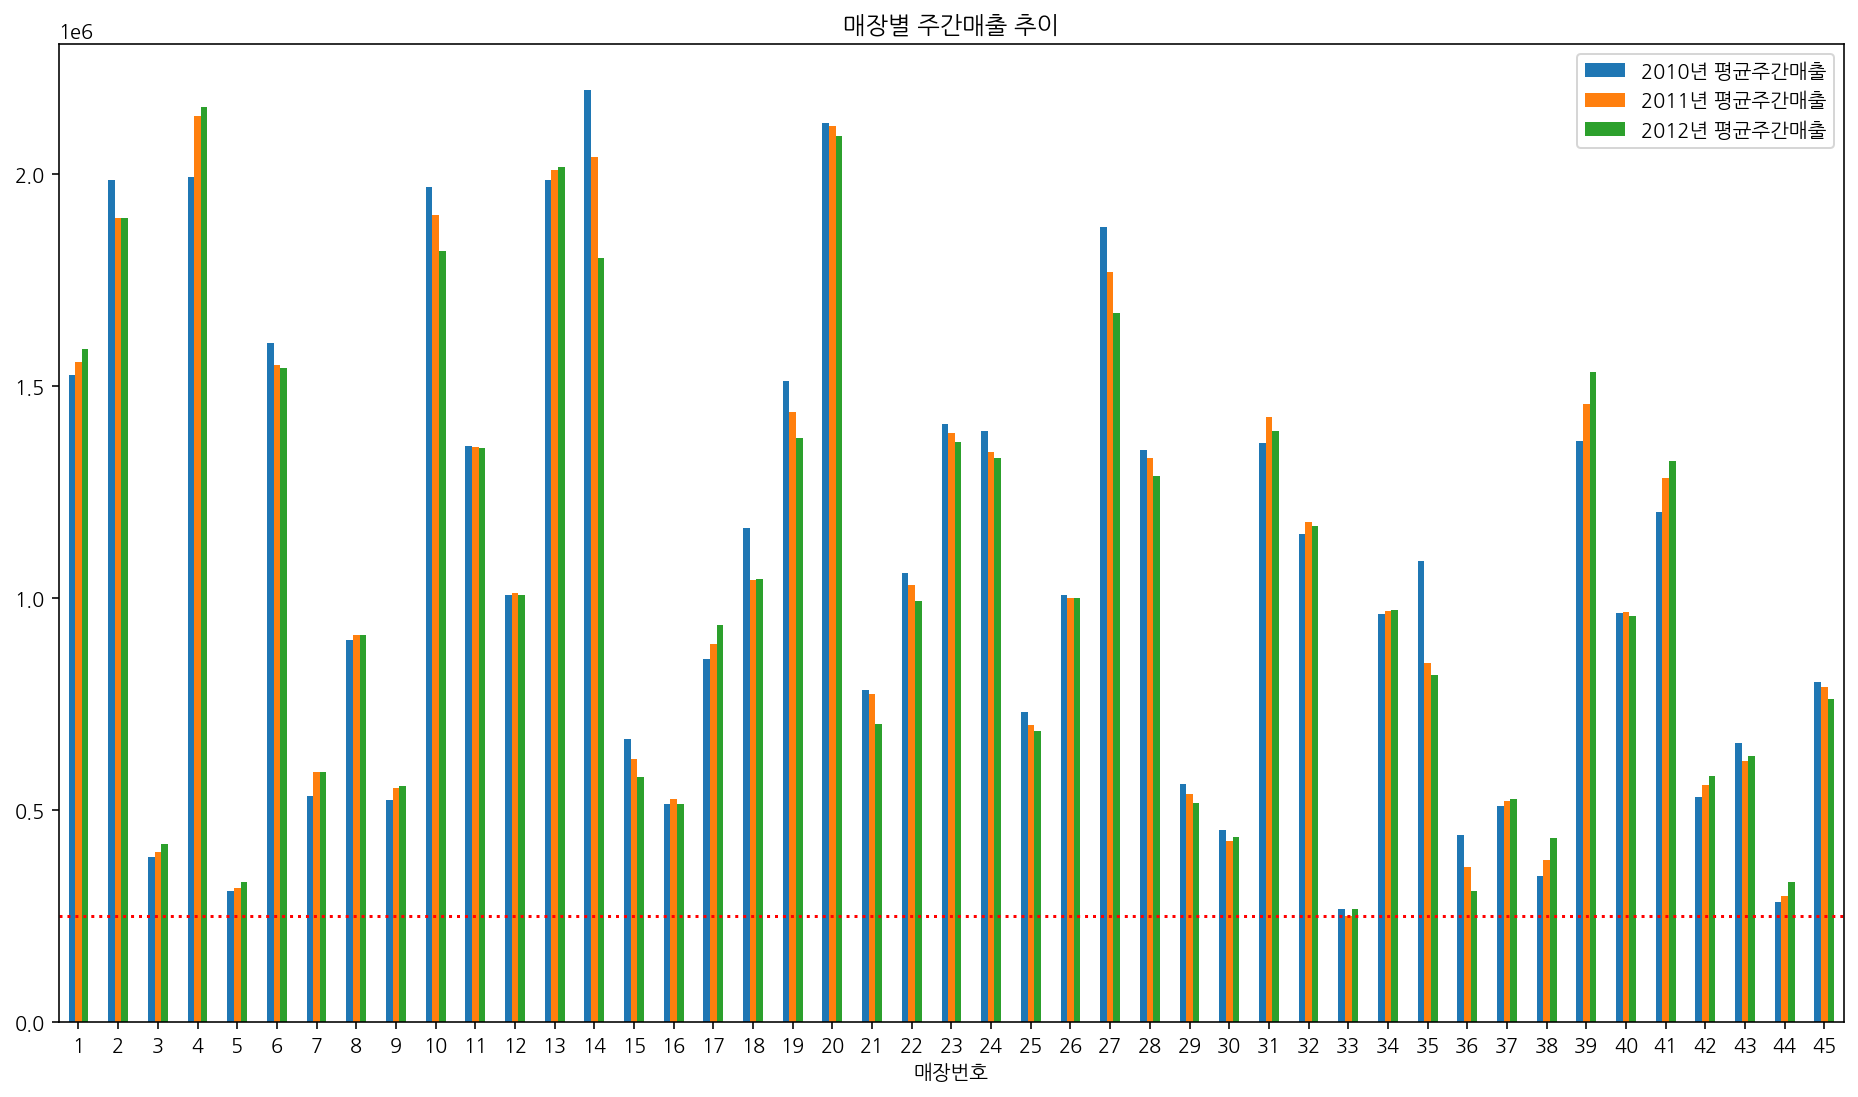

In [ ]:
# 매장별 주간매출 추이
weeksales_trend_list =[avg_2010weeksales, avg_2011weeksales, avg_2012weeksales]
weeksales_trends = pd.concat(weeksales_trend_list, axis=1)
weeksales_trends.columns = ['2010년 평균주간매출', '2011년 평균주간매출', '2012년 평균주간매출']
weeksales_trends.plot(kind='bar', figsize=(16, 9), rot=0, title='매장별 주간매출 추이');
plt.axhline(np.average(df_2011.loc[df_2011['매장번호']==33, '주간매출']), color='red', ls=':');

# 3. 어느 매장이 주간 매출 기준 최대 표준편차를 가지는가?

In [ ]:
'''사용한 변수
df_std : 주간매출 표준편차
df_plot : '판매날짜' 순서로 정렬한 df
df_14, df_10, df_37, df_30 : 표준편차 비교에 사용한 매장
'''

df_std = round(df.groupby('매장번호')['주간매출'].std(),2).sort_values(ascending = False)
df_std = pd.DataFrame(df_std).reset_index()
df_std.columns = ['매장번호', '매출표준편차']
df_std.head()

,매장번호,매출표준편차
0,14,317569.95
1,10,302262.06
2,20,275900.56
3,4,266201.44
4,13,265507.00


Text(0.5, 1.0, '두 번째 최소 표준편차 매장 : 30번')

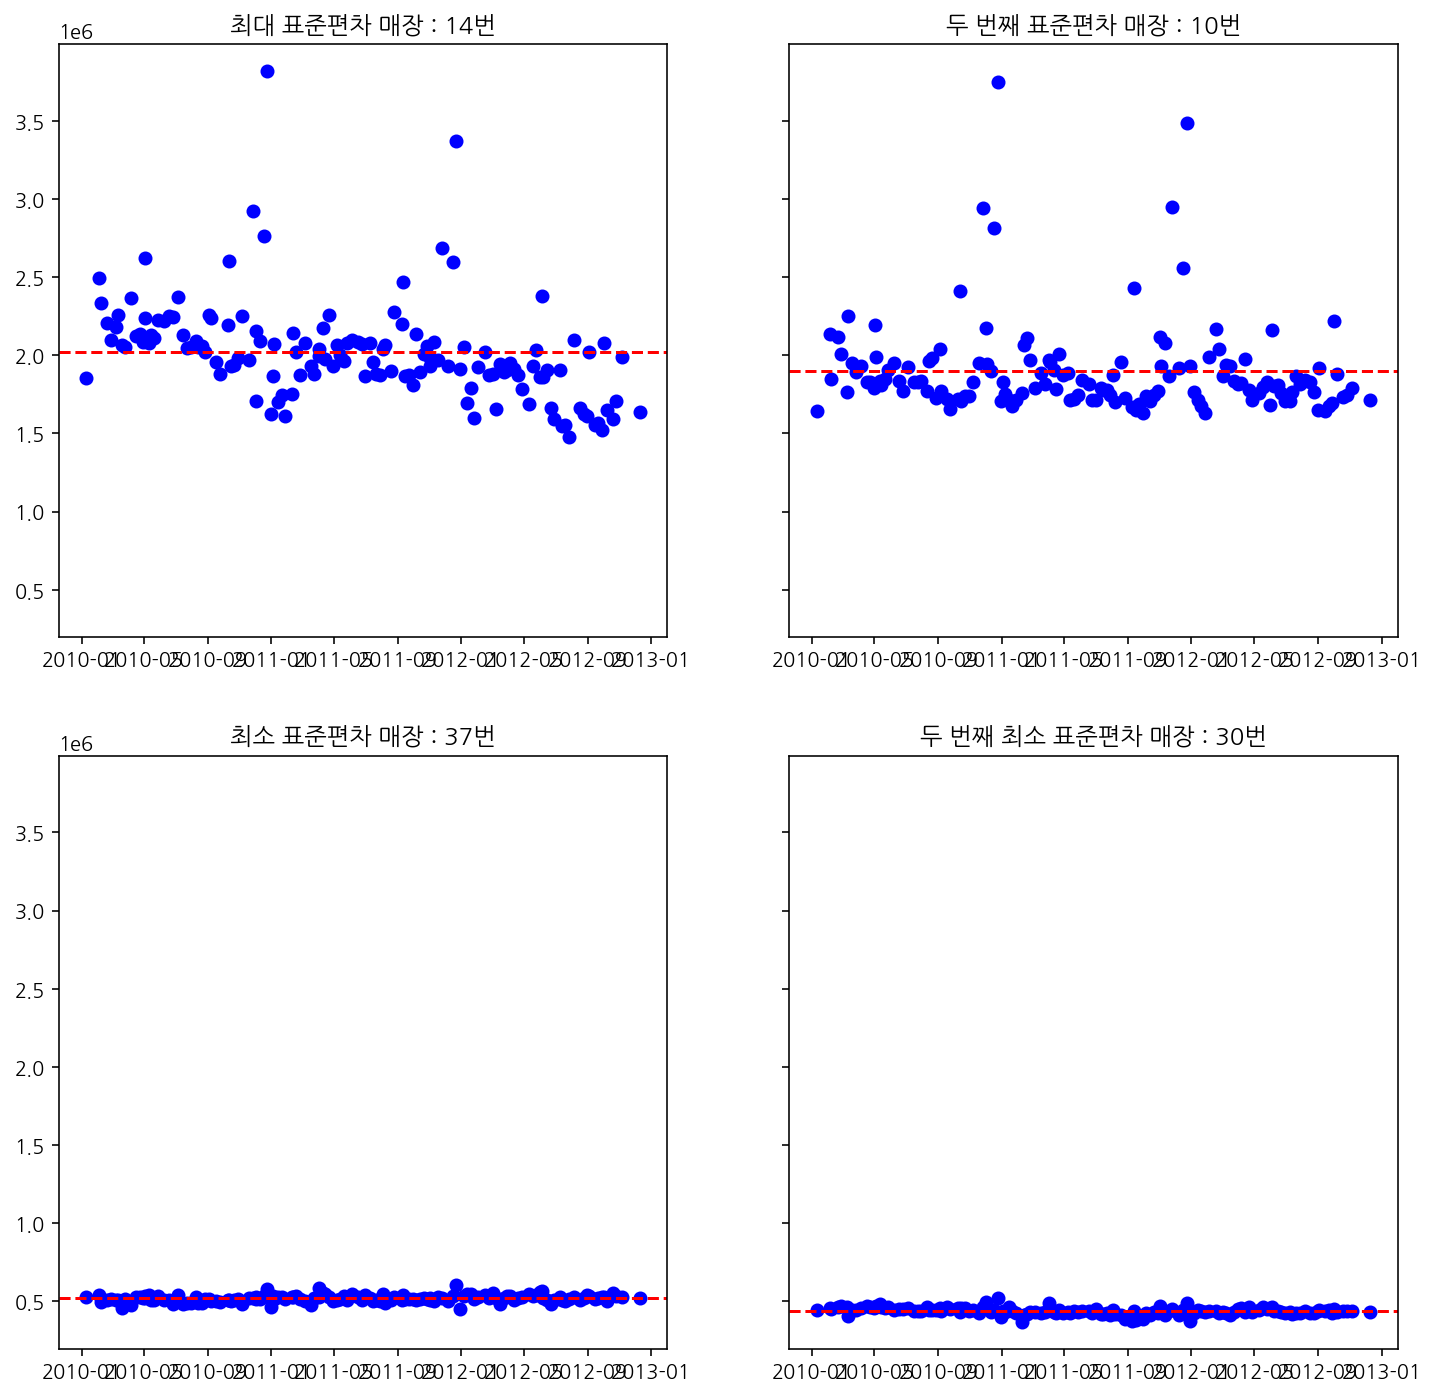

In [ ]:
# 산점도 그리기 : 객체 지향 인터페이스
df_plot = df.sort_values(by='판매날짜', ascending=True)

df_14 = df_plot[df_plot['매장번호']==14]   #상위1등
df_10 = df_plot[df_plot['매장번호']==10]   #상위2등
df_37 = df_plot[df_plot['매장번호']==37]   #하위1등
df_30 = df_plot[df_plot['매장번호']==30]   #하위2등

fig, ax = plt.subplots(2,2, figsize=(12,12), sharey=True)

ax[0][0].plot(df_14['판매날짜'], df_14['주간매출'], 'bo')
ax[0][0].axhline(df_14['주간매출'].mean(), color='r', linestyle='--')
ax[0][0].set_title('최대 표준편차 매장 : 14번')

ax[0][1].plot(df_10['판매날짜'], df_10['주간매출'], 'bo')
ax[0][1].axhline(df_10['주간매출'].mean(), color='r', linestyle='--')
ax[0][1].set_title('두 번째 표준편차 매장 : 10번')

ax[1][0].plot(df_37['판매날짜'], df_37['주간매출'], 'bo')
ax[1][0].axhline(df_37['주간매출'].mean(), color='r', linestyle='--')
ax[1][0].set_title('최소 표준편차 매장 : 37번')

ax[1][1].plot(df_30['판매날짜'], df_30['주간매출'], 'bo')
ax[1][1].axhline(df_30['주간매출'].mean(), color='r', linestyle='--')
ax[1][1].set_title('두 번째 최소 표준편차 매장 : 30번')

# 4. 어느 매장이 주간 매출 기준 최소 표준편차를 가지는가?

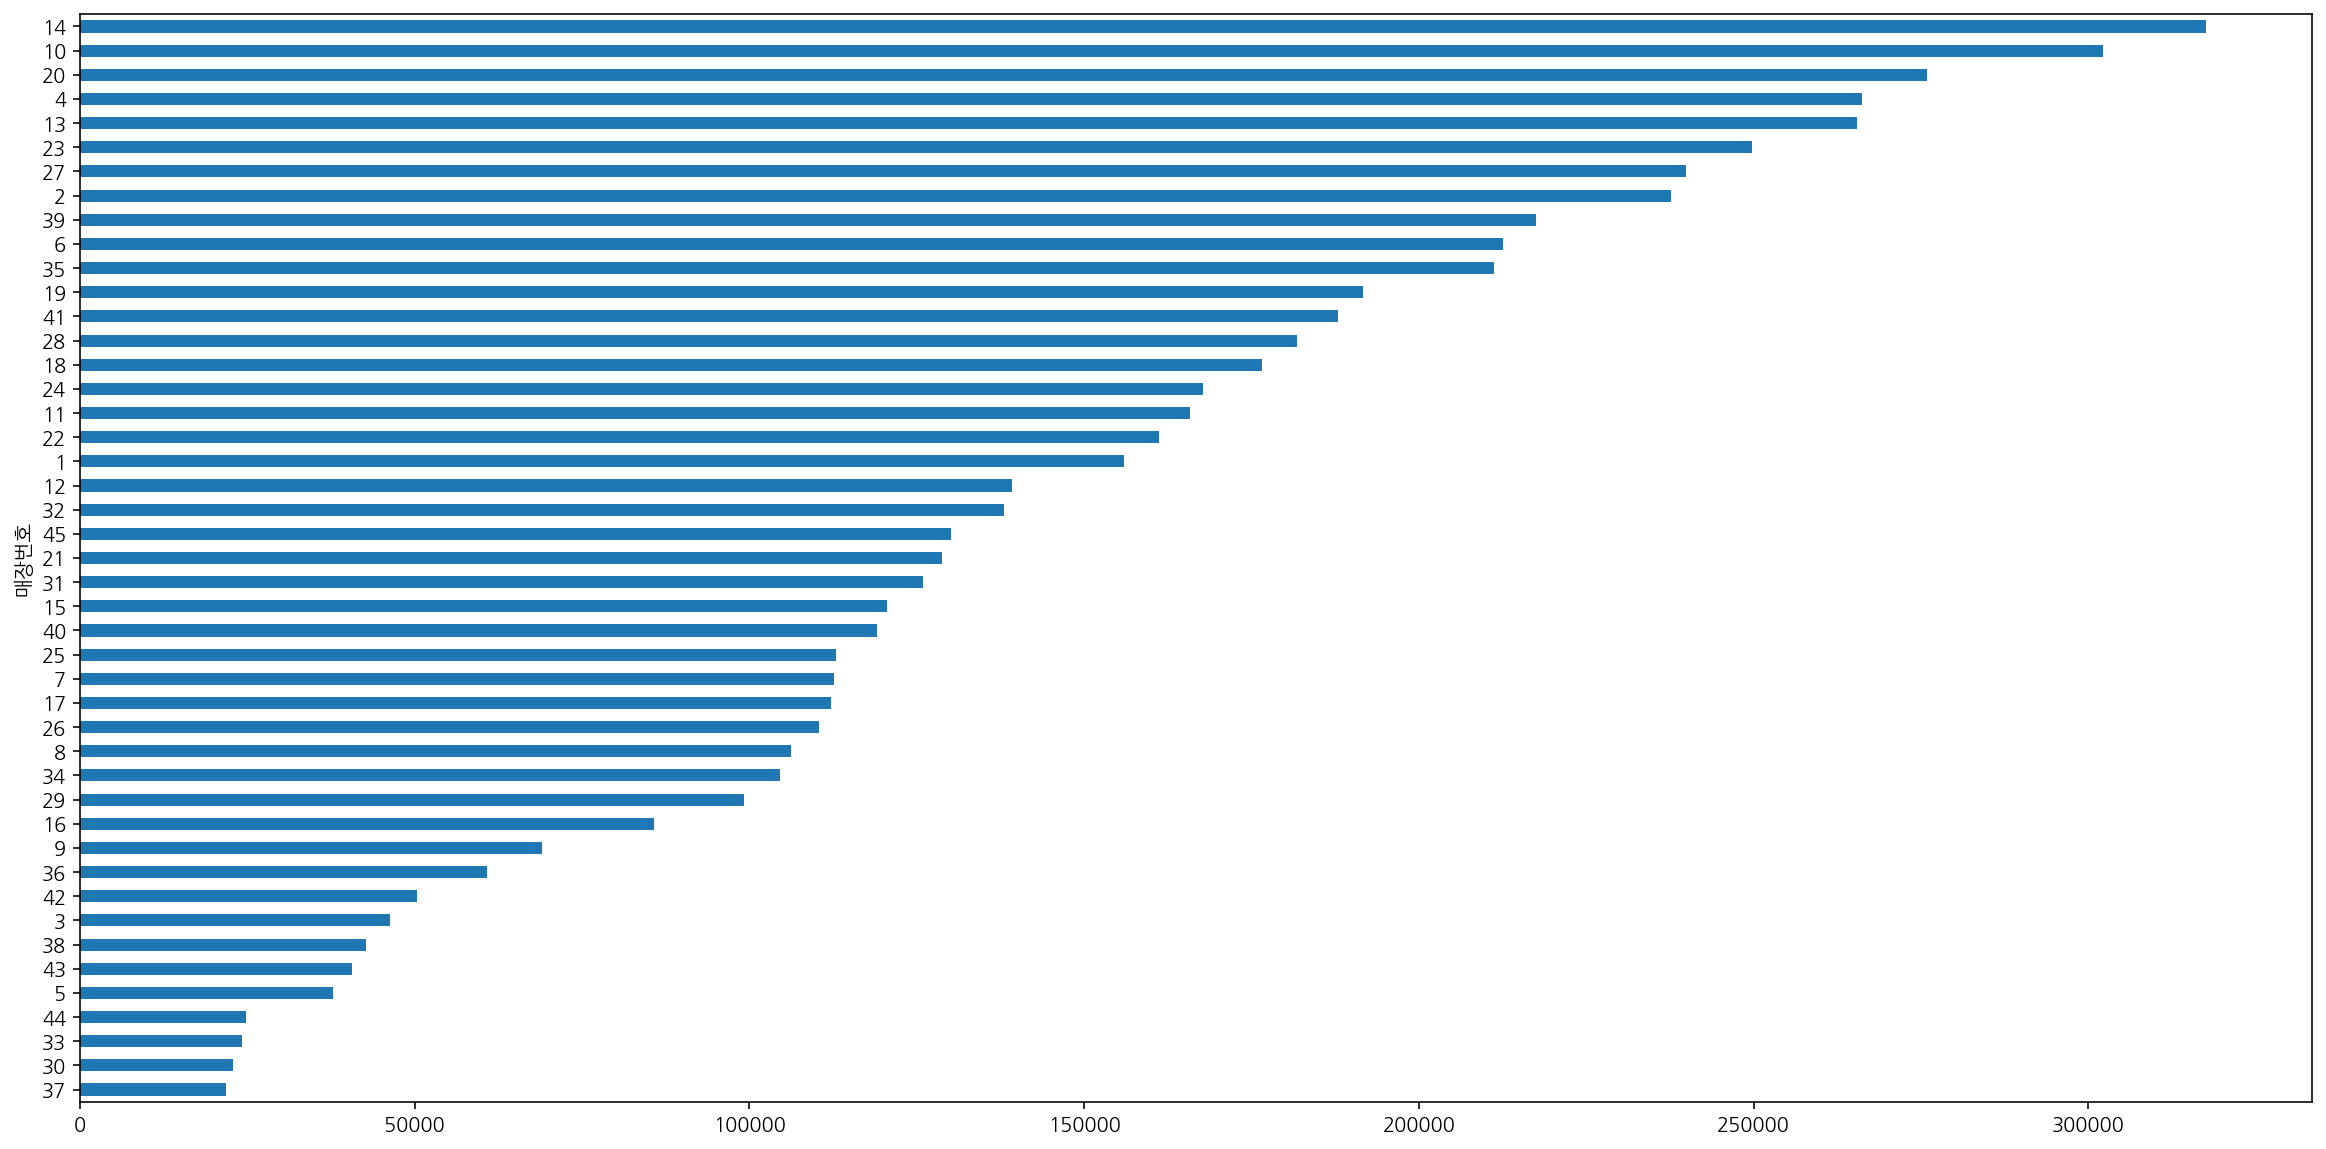

In [ ]:
# 전체기간 기준 표준편차-> 37번 매장이 최소 표준편차를 갖고 있음.
df_std_04 = round(df.groupby("매장번호")["주간매출"].std(),2).sort_values(axis = 0) # 표준편차를 구하고 정렬해서 최솟값에 해당하는 매장 구하기
df_std_04.plot(kind = "barh", figsize = (20,10));

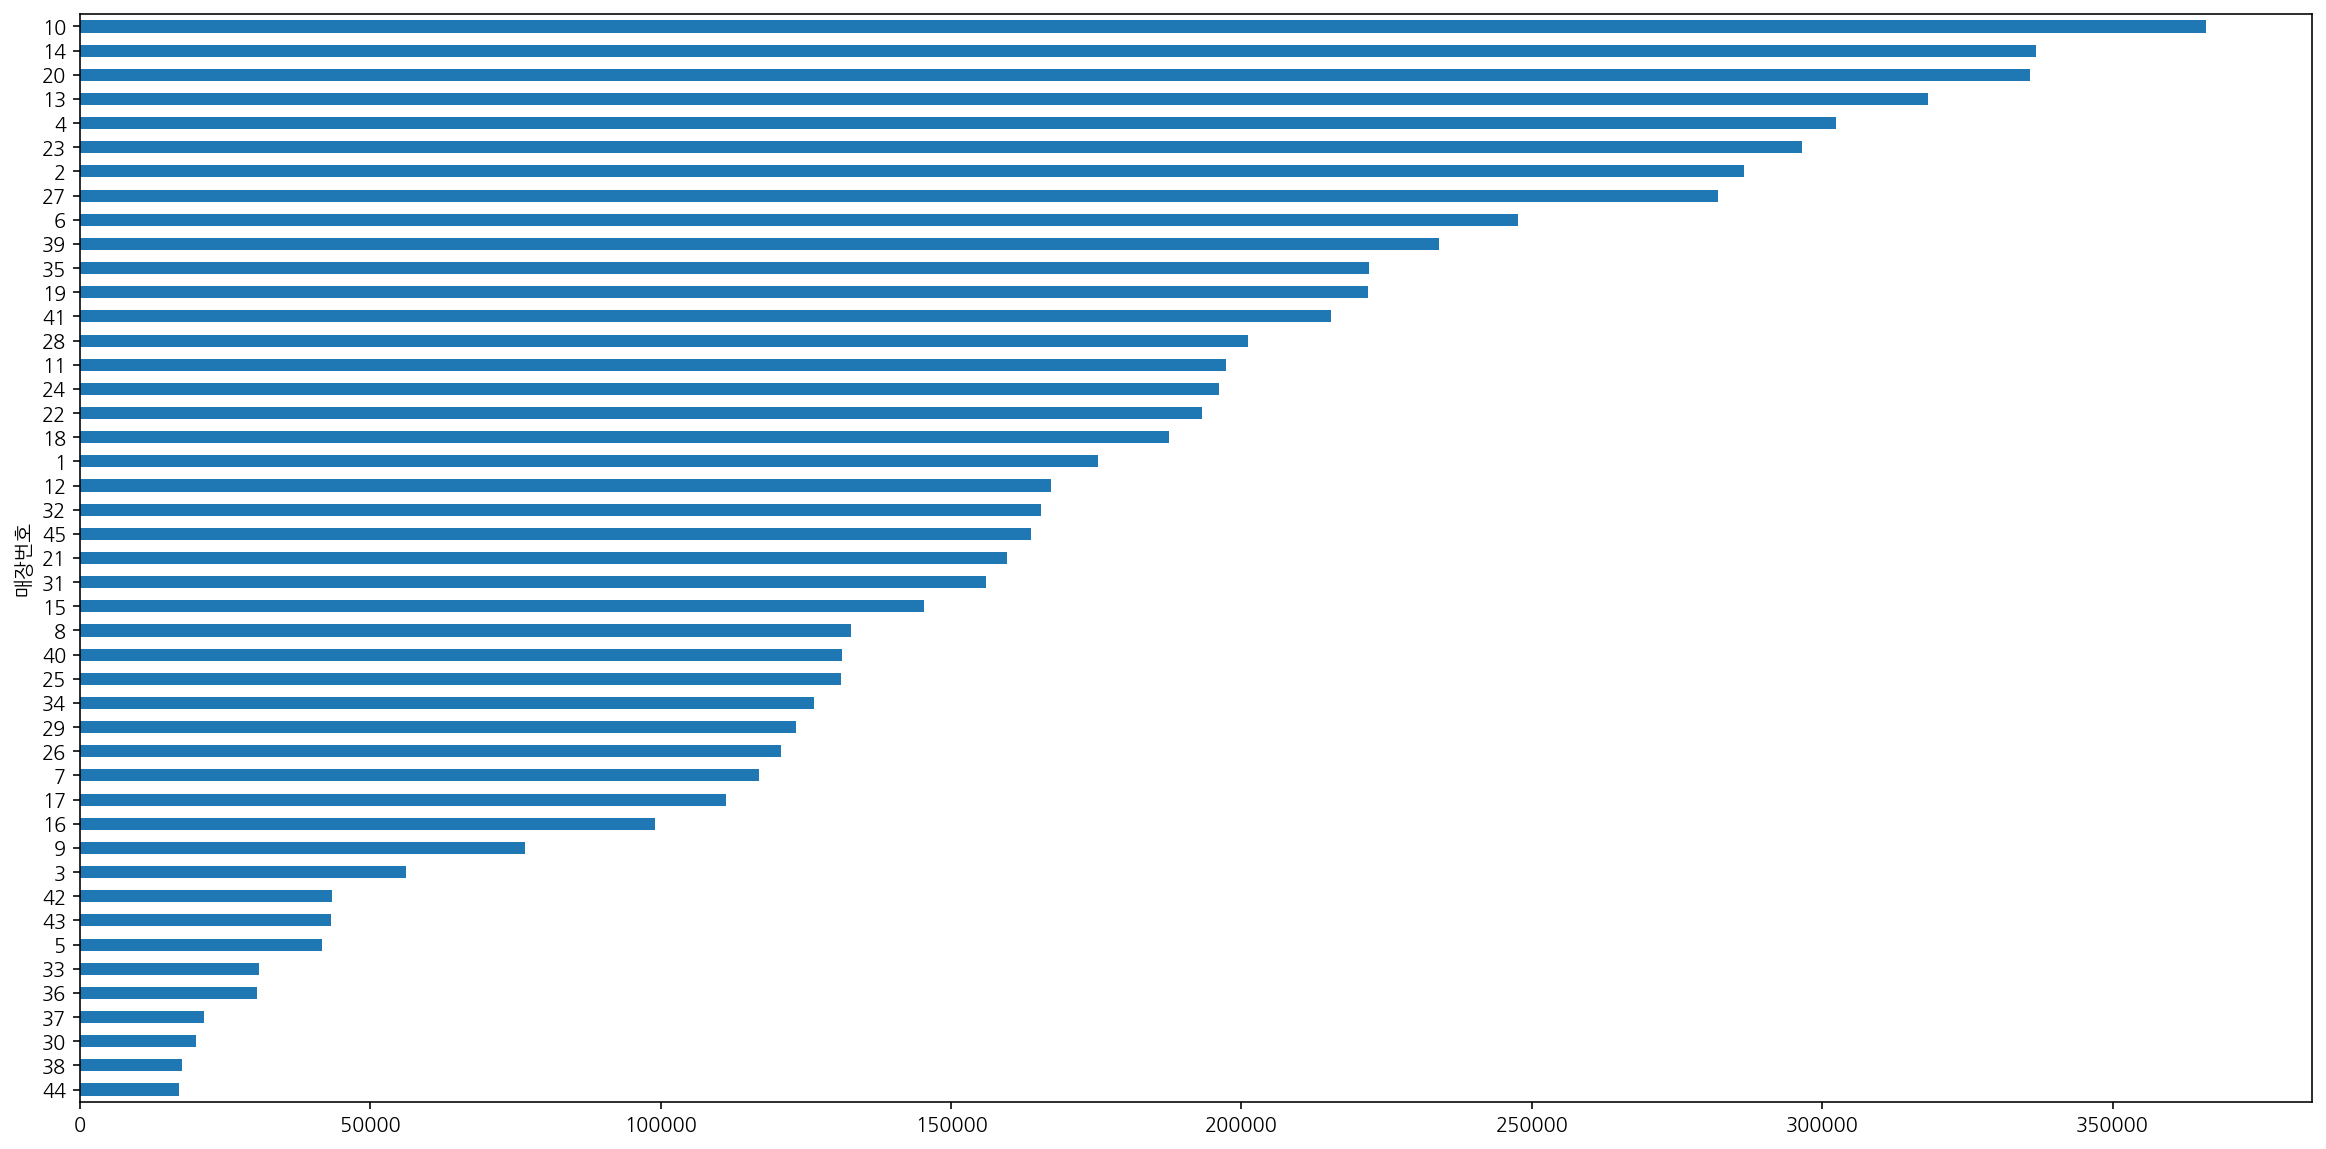

In [ ]:
# 2010년 기준 막대그래프
df_std_2010 =  df.loc[df["연도"] == 2010, ["매장번호","주간매출"]]
df_std_2010 = pd.DataFrame(df_std_2010)
df_std_2010 = round(df_std_2010.groupby("매장번호")["주간매출"].std(),2).sort_values(axis = 0)
df_std_2010.plot(kind = "barh", figsize = (20,10));

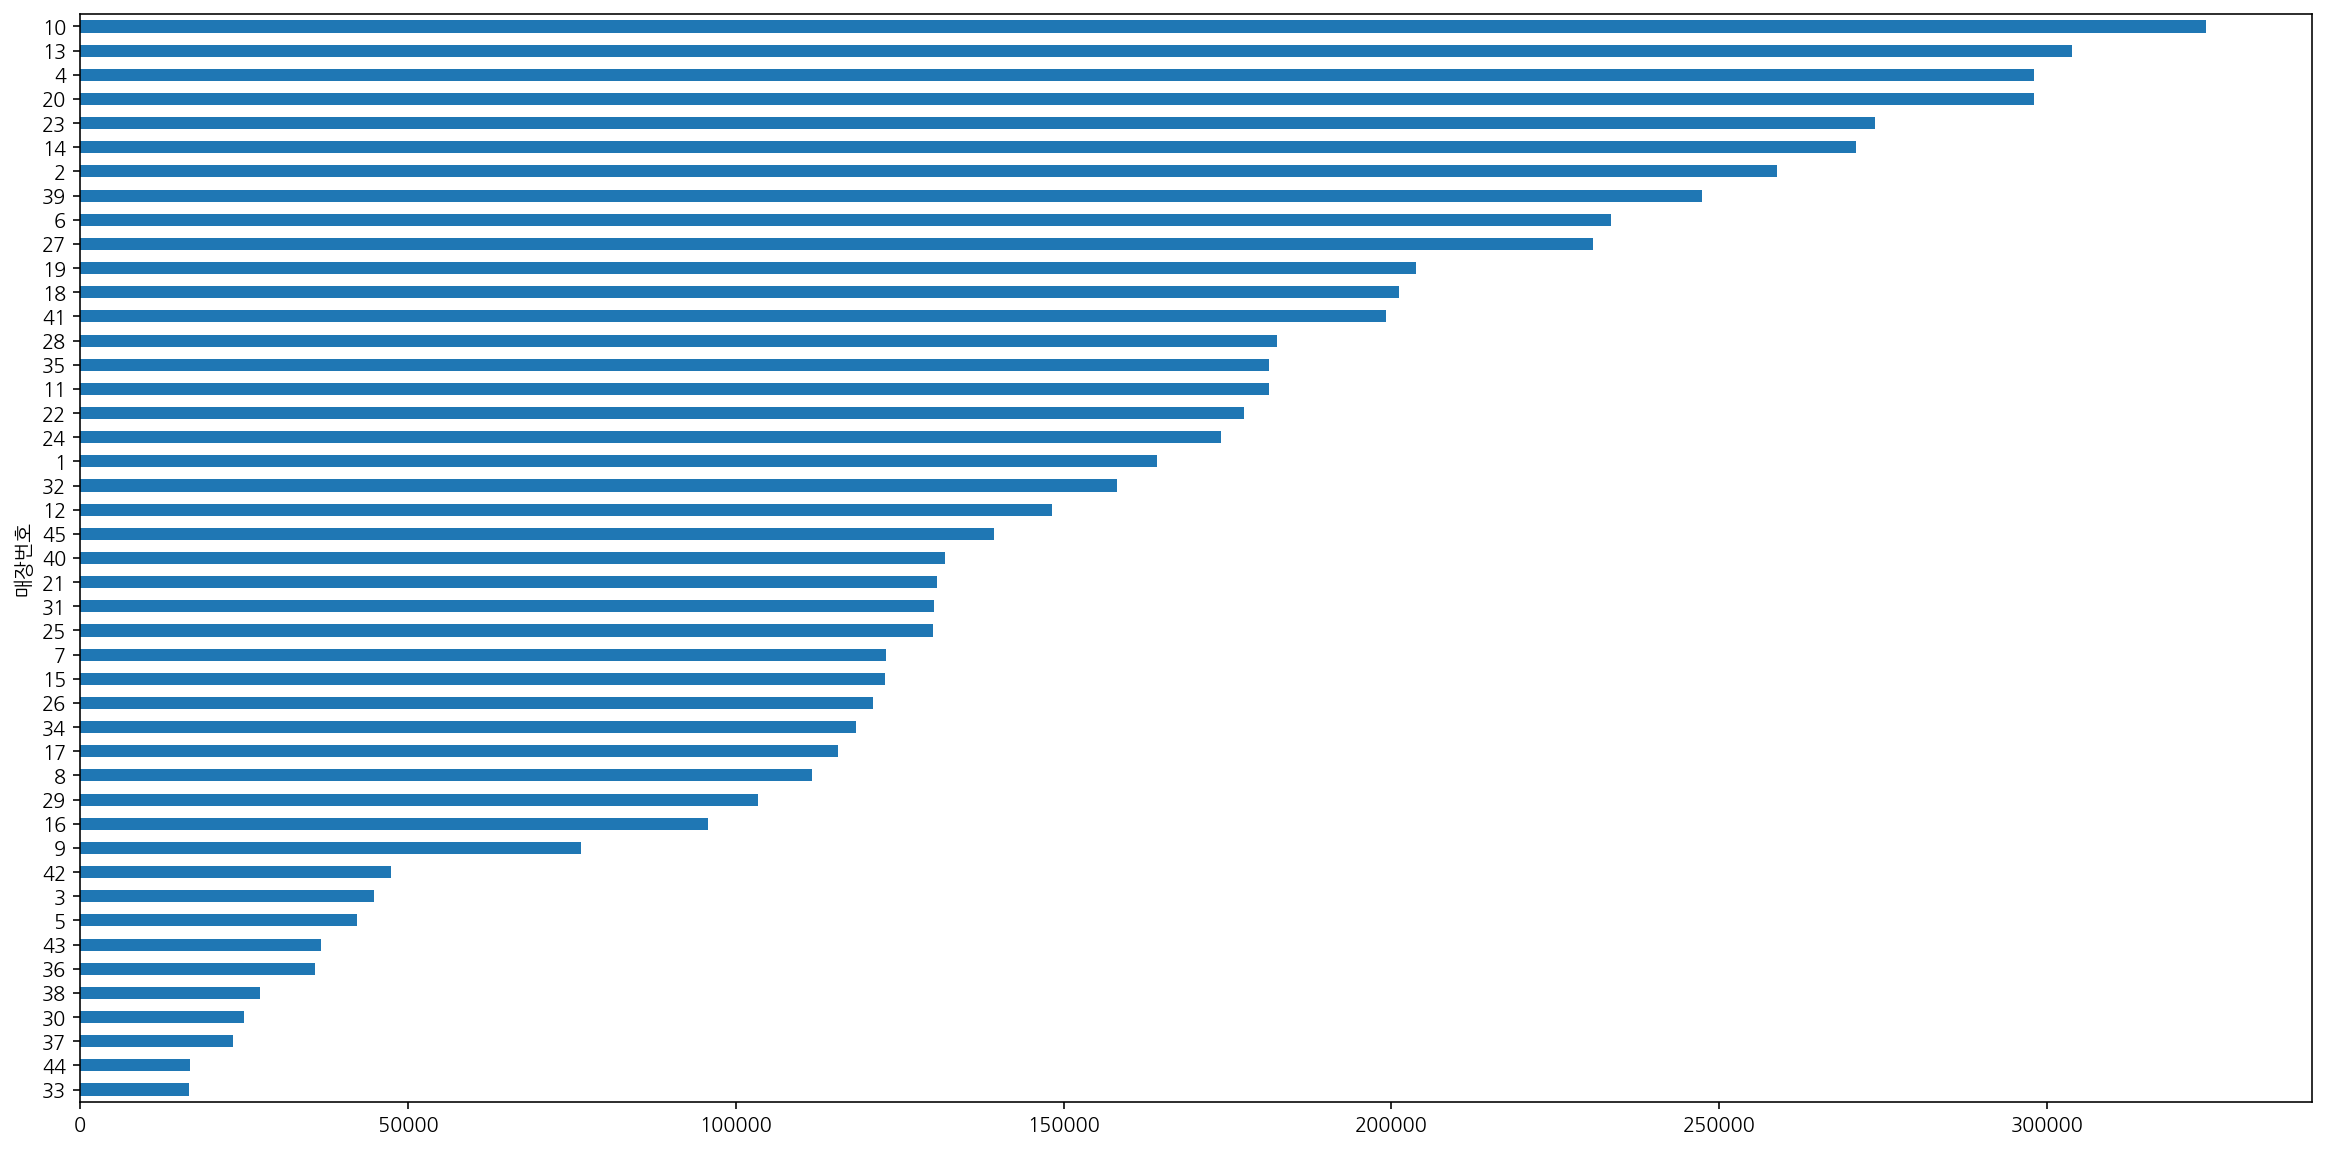

In [ ]:
# 2011년 기준 막대그래프
df_std_2011 =  df.loc[df["연도"] == 2011, ["매장번호","주간매출"]]
df_std_2011 = pd.DataFrame(df_std_2011)
df_std_2011 = round(df_std_2011.groupby("매장번호")["주간매출"].std(),2).sort_values(axis = 0)
df_std_2011.plot(kind = "barh", figsize = (20,10));

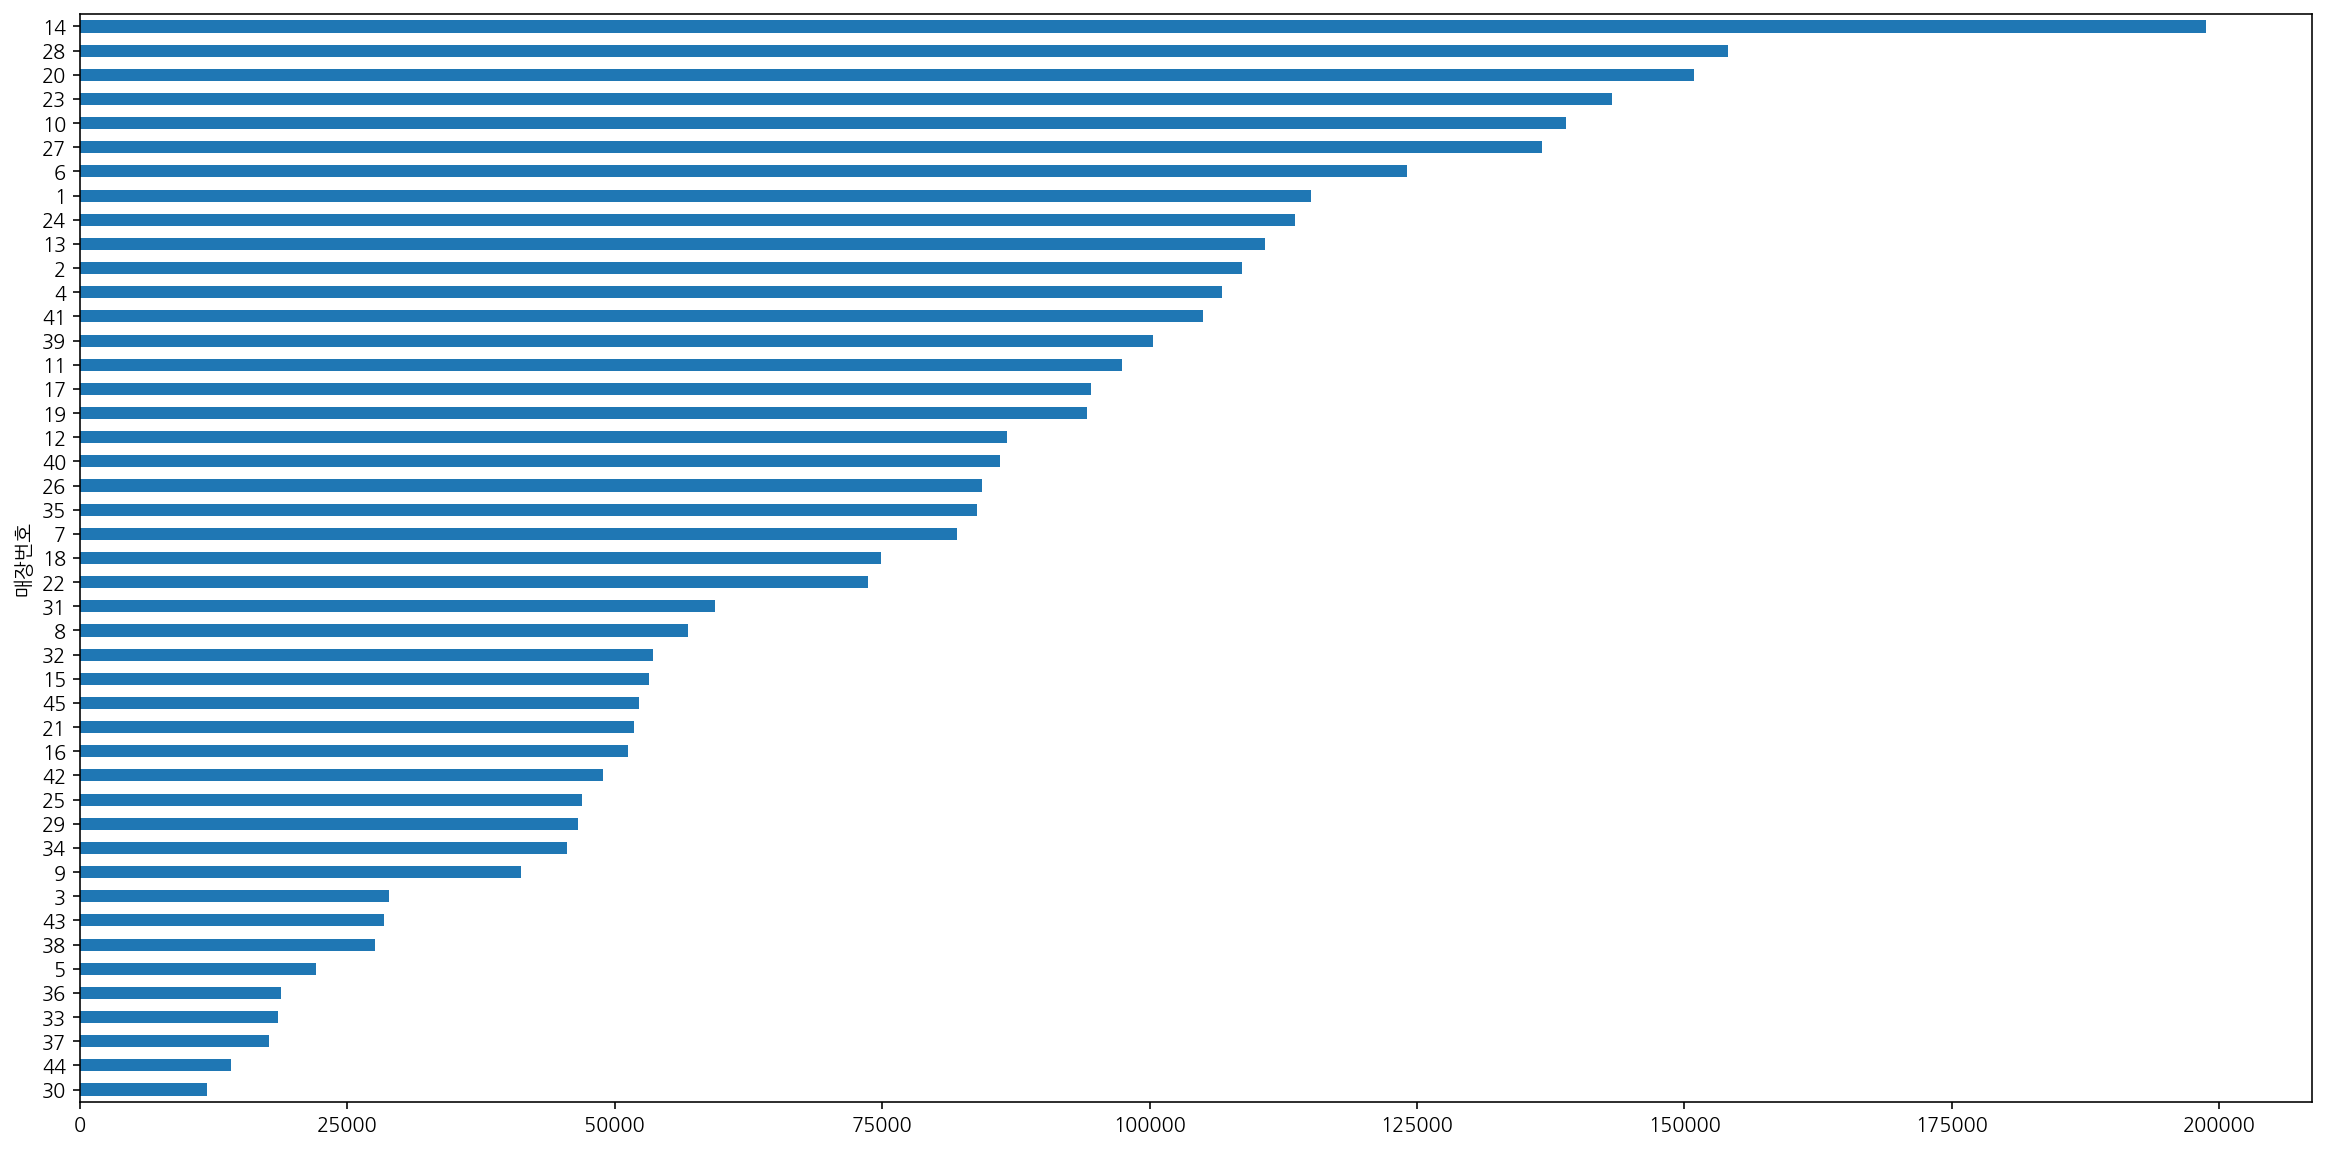

In [ ]:
# 2012년 기준 막대그래프
df_std_2012 =  df.loc[df["연도"] == 2012, ["매장번호","주간매출"]]
df_std_2012 = pd.DataFrame(df_std_2012)
df_std_2012 = round(df_std_2012.groupby("매장번호")["주간매출"].std(),2).sort_values(axis = 0)
df_std_2012.plot(kind = "barh", figsize = (20,10));

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



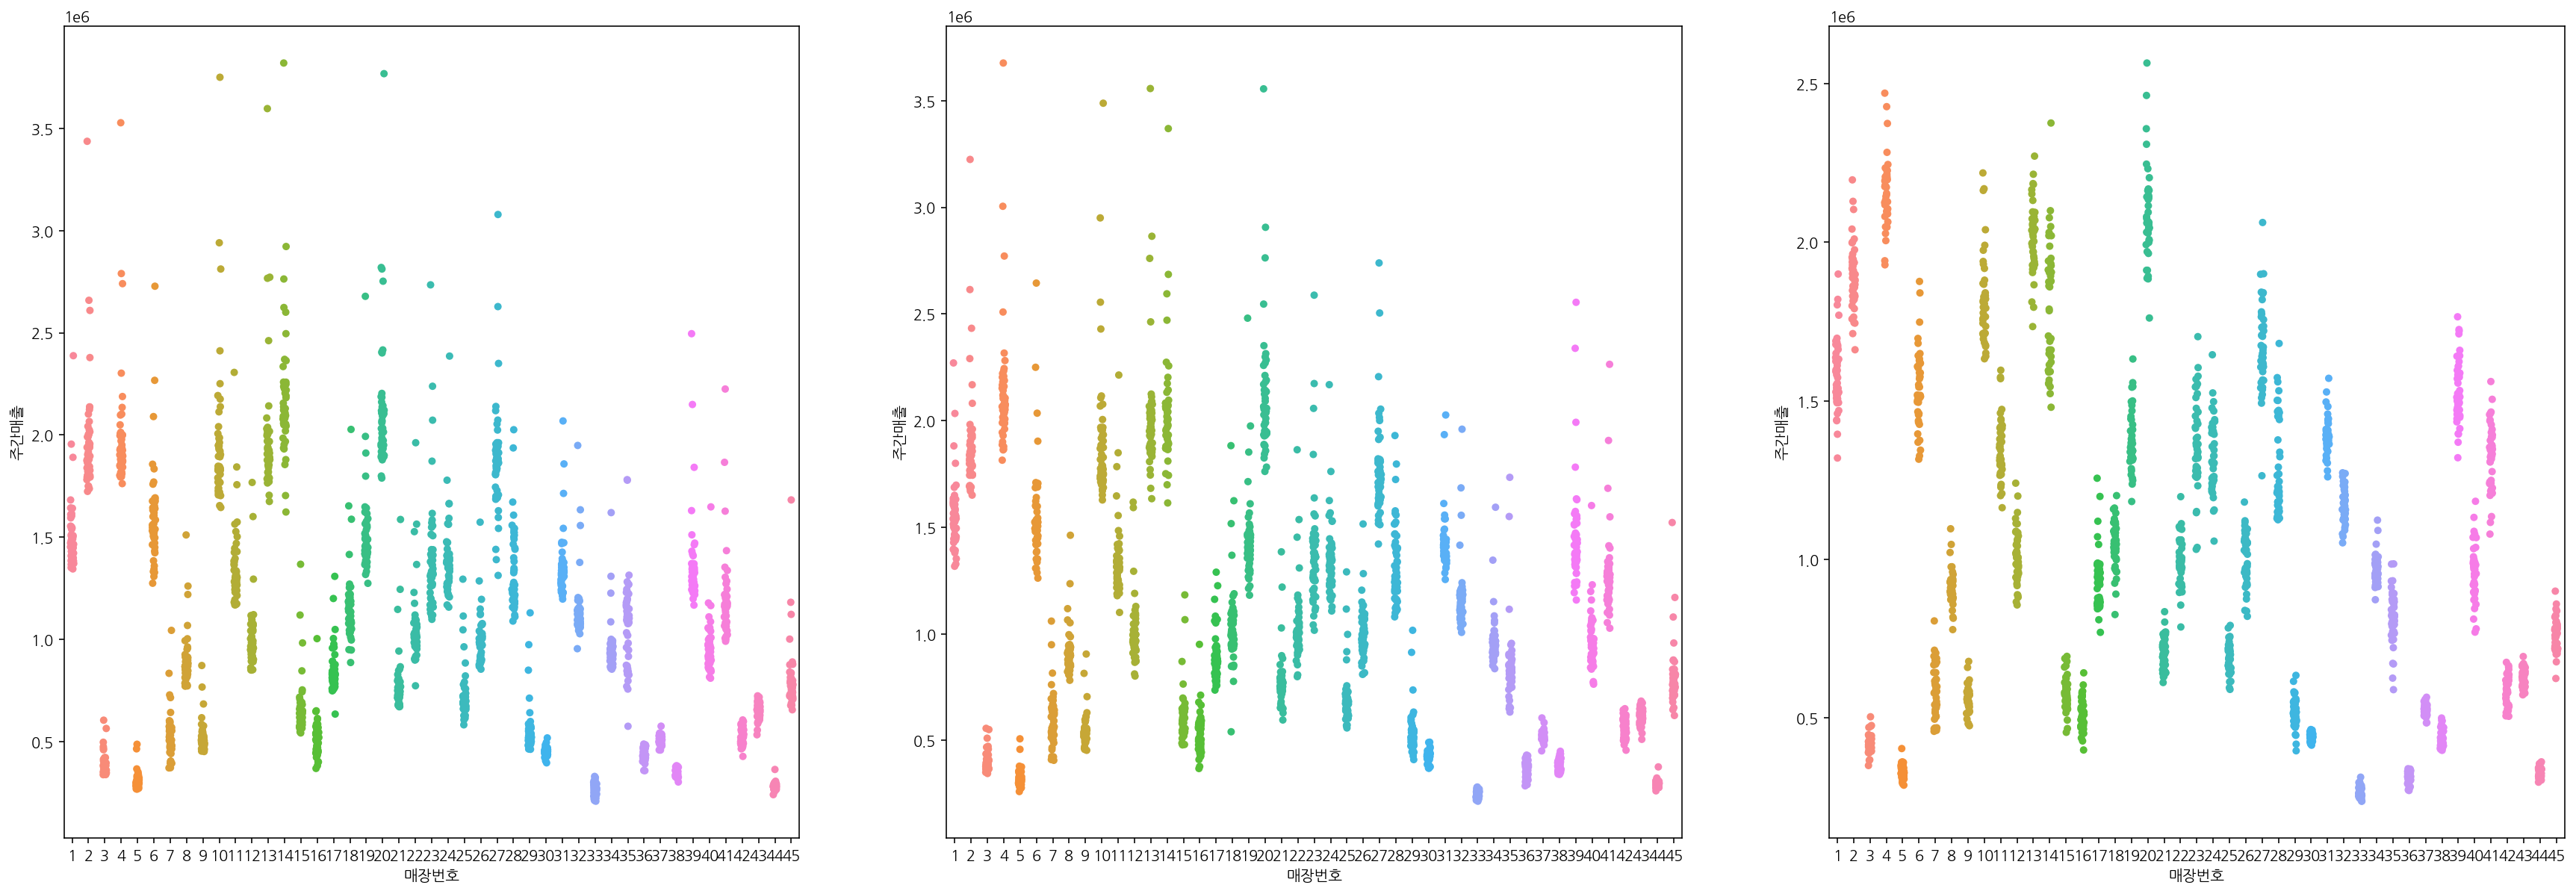

In [ ]:
# 3개년도 데이터프레임 만들기
df_std_2010 =  df.loc[df["연도"] == 2010, ["매장번호","주간매출"]]
df_std_2010 = pd.DataFrame(df_std_2010)
df_std_2011 =  df.loc[df["연도"] == 2011, ["매장번호","주간매출"]]
df_std_2011 = pd.DataFrame(df_std_2011)
df_std_2012 =  df.loc[df["연도"] == 2012, ["매장번호","주간매출"]]
df_std_2012 = pd.DataFrame(df_std_2012)

# 3개년도 매장별 주간매출 그래프 한 번에 그리기
fig, ax = plt.subplots(ncols = 3, figsize = (30,10))
sns.stripplot("매장번호", "주간매출", data = df_std_2010, ax = ax[0])
sns.stripplot("매장번호", "주간매출", data = df_std_2011, ax = ax[1])
sns.stripplot("매장번호", "주간매출", data = df_std_2012, ax = ax[2])

# 5. 2012년 3분기 매장 매출 증감율이 가장 큰(작은) 매장은?

In [ ]:
# 2012년 3분기 매장별 총 매출액 df_2012_3Q
df_2012_3Q = df.loc[(df["연도"] == 2012) & ((df["월"] == 7) | (df["월"] == 8) | (df["월"] == 9)), ["매장번호", "판매날짜", "주간매출"]]
df_2012_3Q = df_2012_3Q.groupby(['매장번호']).sum() 
# 2011년 3분기 매장별 총 매출액 df_2011_3Q
df_2011_3Q = df.loc[(df["연도"] == 2011) & ((df["월"] == 7) | (df["월"] == 8) | (df["월"] == 9)), ["매장번호", "판매날짜", "주간매출"]]
df_2011_3Q = df_2011_3Q.groupby(['매장번호']).sum() 
# 2012년 2분기 매장별 총 매출액 df_2012_2Q
df_2012_2Q = df.loc[(df["연도"] == 2012) & ((df["월"] == 4) | (df["월"] == 5) | (df["월"] == 6)), ["매장번호", "판매날짜", "주간매출"]]
df_2012_2Q = df_2012_2Q.groupby(['매장번호']).sum()

# 컬럼명 변경
df_2012_3Q.rename(columns={'주간매출':'12년 3분기 총매출'},inplace=True)
df_2011_3Q.rename(columns={'주간매출':'11년 3분기 총매출'},inplace=True)
df_2012_2Q.rename(columns={'주간매출':'12년 2분기 총매출'},inplace=True)

# 데이터 병합
df_1112 = pd.concat([df_2011_3Q,df_2012_3Q], axis=1)
df_2Q3Q = pd.concat([df_2012_2Q,df_2012_3Q], axis=1)

# 매출 증가율 비교 상위 5곳
df_1112["매출증감율"] = (df_1112["12년 3분기 총매출"] - df_1112["11년 3분기 총매출"]) / df_1112["11년 3분기 총매출"] * 100
df_1112 = df_1112.sort_values(by="매출증감율", ascending=False)
df_1112 = df_1112.head()
df_2Q3Q["매출증감율"] = (df_2Q3Q["12년 3분기 총매출"] - df_2Q3Q["12년 2분기 총매출"]) / df_2Q3Q["12년 2분기 총매출"] * 100
df_2Q3Q = df_2Q3Q.sort_values(by="매출증감율", ascending=False)
df_2Q3Q = df_2Q3Q.head()

In [ ]:
# 시각화 편의를 위한 변수 지정
df_1112_show = df_1112["매출증감율"]
df_2Q3Q_show = df_2Q3Q["매출증감율"]

In [ ]:
display(df_1112) # 11년 3분기 대비 12년 3분기 총매출은 감소, 매출 감소율이 제일 작은 곳은 44번 매장
display(df_2Q3Q) # 12년 2분기 대비 12년 3분기 총매출은 감소, 매출 감소율이 제일 작은 곳은 16번 매장

,11년 3분기 총매출,12년 3분기 총매출,매출증감율
매장번호,,,
44,4187060.18,4020486.01,-3.978308
38,5446332.58,5129297.64,-5.821072
39,20093026.01,18899955.17,-5.937736
3,5341819.41,4966495.93,-7.026136
5,4228923.87,3880621.88,-8.236185


,12년 2분기 총매출,12년 3분기 총매출,매출증감율
매장번호,,,
16,6626133.44,6441311.11,-2.789294
7,7613593.92,7322393.92,-3.824738
35,10753570.97,10252122.68,-4.663086
26,13218289.66,12417575.35,-6.057624
39,20191585.63,18899955.17,-6.396875


In [ ]:
# plotly를 활용한 시각화
# 11년 3분기 대비 12년 3분기 총매출은 감소
# 매출 감소율이 하위 5곳 표시, 매출 감소율이 가장 작은 매장은 44번 매장
px.bar(df_1112_show, title = "11년 3분기 대비 12년 3분기 총매출 증감율")

In [ ]:
# plotly를 활용한 시각화
# 12년 2분기 대비 12년 3분기 총매출은 감소
# 매출 감소율이 하위 5곳 표시, 매출 감소율이 가장 작은 매장은 16번 매장
px.bar(df_2Q3Q_show, title = "12년 2분기 대비 12년 3분기 총매출 증감율")

# 6. 점포별 매출, 실업률

In [ ]:
store_sales_unemp = df.groupby('매장번호')[['주간매출','실업률']].mean()
store_sales_unemp

,주간매출,실업률
매장번호,,
1,1.555264e+06,7.611119
2,1.925751e+06,7.622937
3,4.027044e+05,7.175804
4,2.094713e+06,5.965455
5,3.180118e+05,6.294895
6,1.564728e+06,6.606503
7,5.706173e+05,8.586224
8,9.087495e+05,6.090839
9,5.439806e+05,6.099720


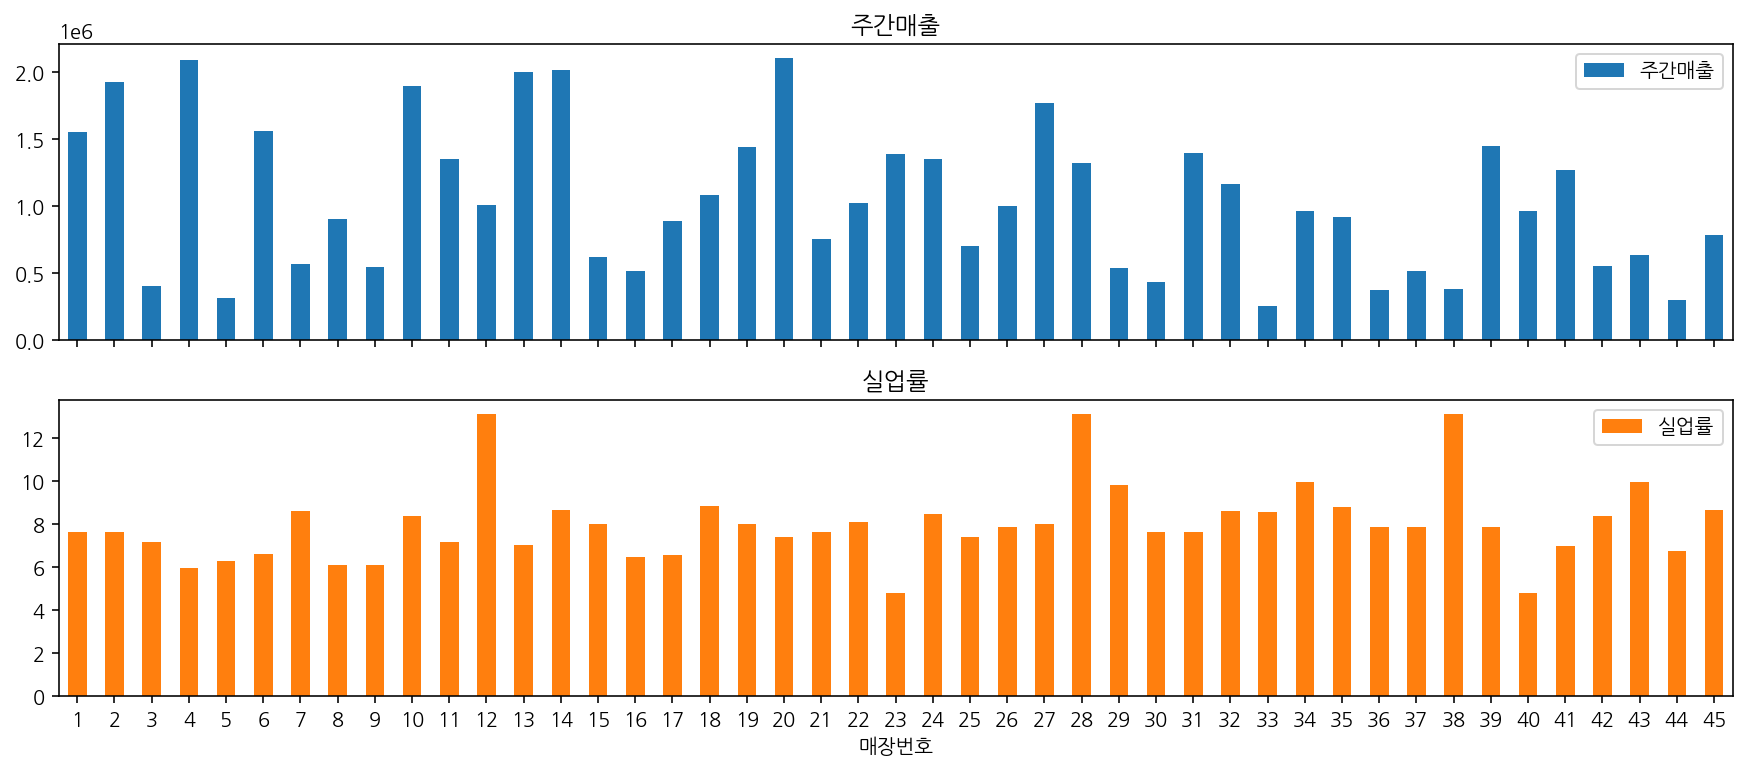

In [ ]:
# 점포별 평균 주간매출과 평균 실업률 시각화 - subplot 사용
store_sales_unemp.plot(kind='bar', figsize=(15,6), subplots='실업률', rot=0);

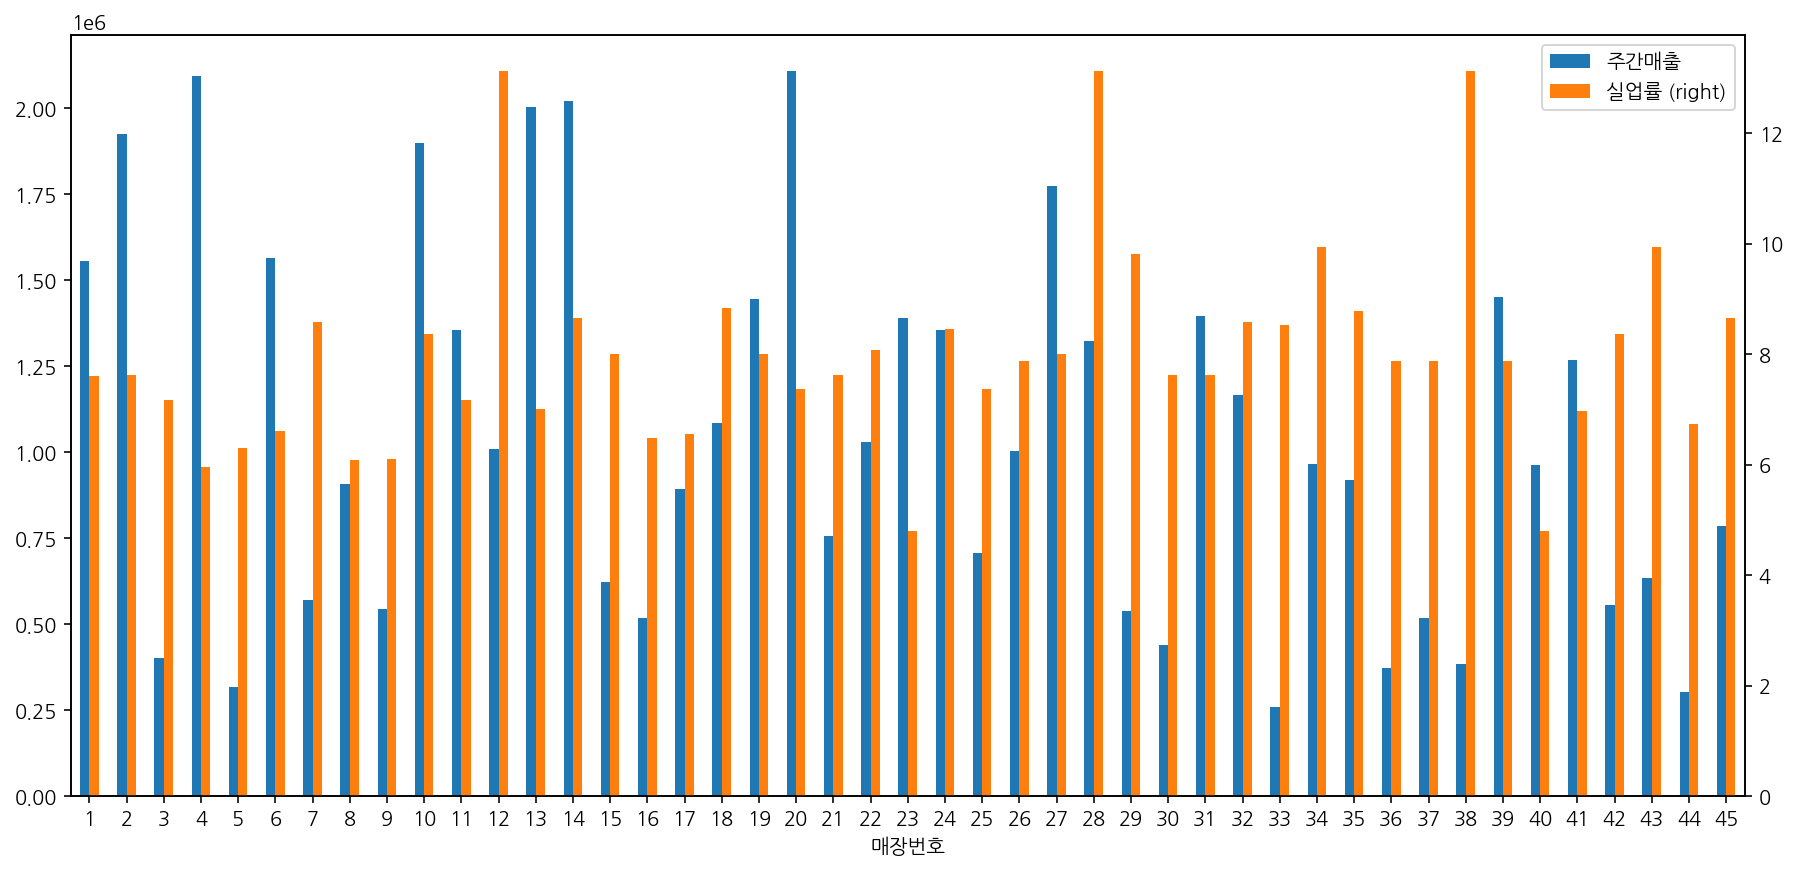

In [ ]:
# 점포별 평균 주간매출과 평균 실업률 시각화 - 2축 그래프 사용
store_sales_unemp.plot(kind='bar', figsize=(15,7), secondary_y='실업률', rot=0);

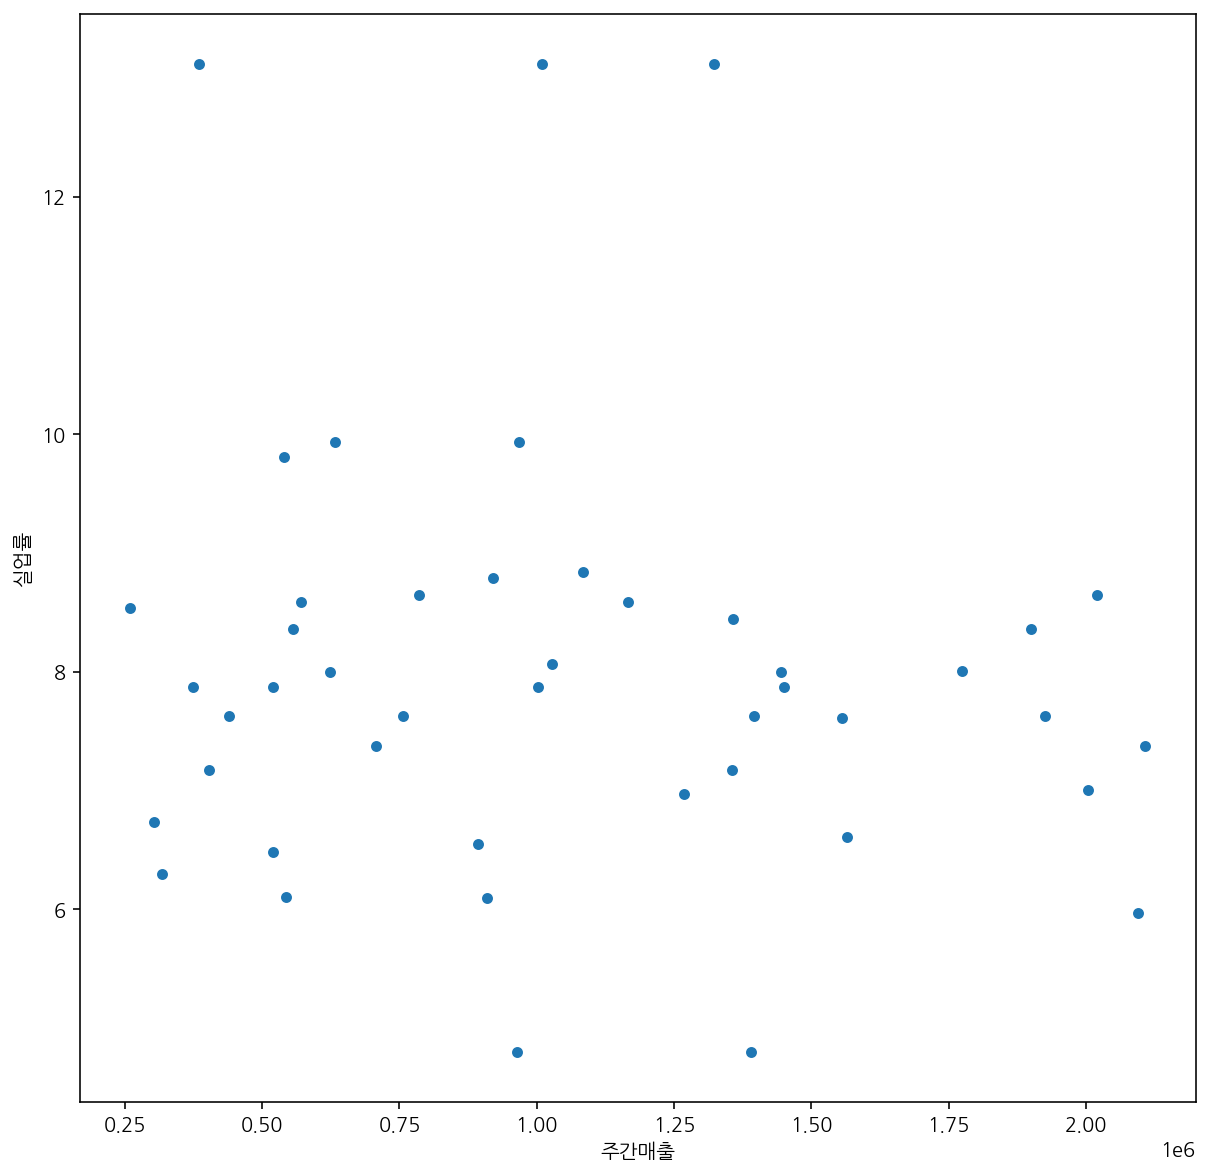

In [ ]:
# 점포별 평균 주간매출과 평균 실업률 scatter plot 확인
# 두 값 사이에 눈에 띄는 상관관계를 확인할 수 없다
store_sales_unemp.plot(kind='scatter', x='주간매출', y='실업률', figsize=(10,10), rot=0);

In [ ]:
store_sales_unemp.corr()

,주간매출,실업률
주간매출,1.000000,-0.112304
실업률,-0.112304,1.000000


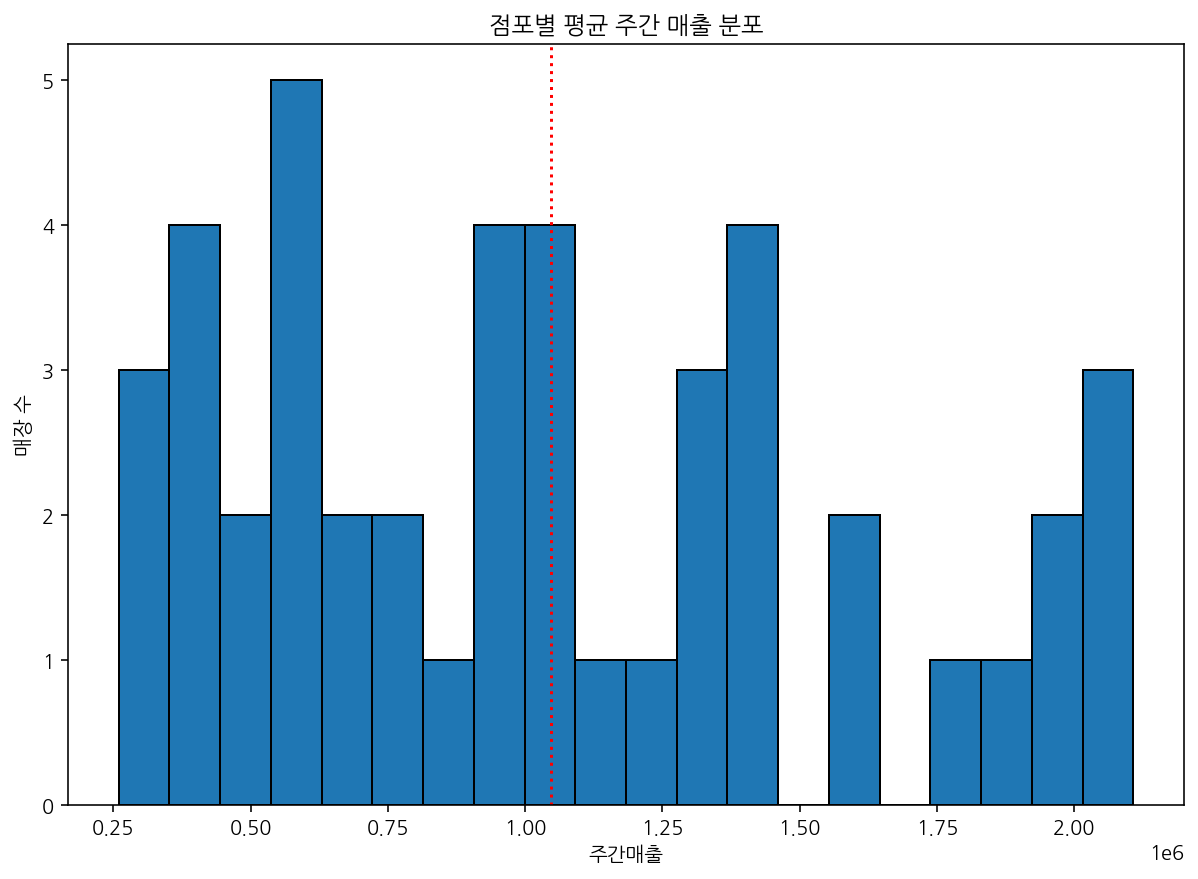

In [ ]:
# 점포별 평균 주간 매출 분포 시각화 - 히스토그램
store_sales = store_sales_unemp.loc[:, '주간매출'].copy()
store_sales_hist = store_sales.plot.hist(bins=20, figsize=(10, 7), ec='black')
store_sales_hist.set_xlabel('주간매출')
store_sales_hist.set_ylabel('매장 수')
store_sales_hist.set_title('점포별 평균 주간 매출 분포')
# 수직선 : 모든 점포의 주간 매출 평균
store_sales_hist.axvline(store_sales.mean(), color='red', ls=':')
plt.show()

In [ ]:
store_sales.mean()

1046964.8775617717

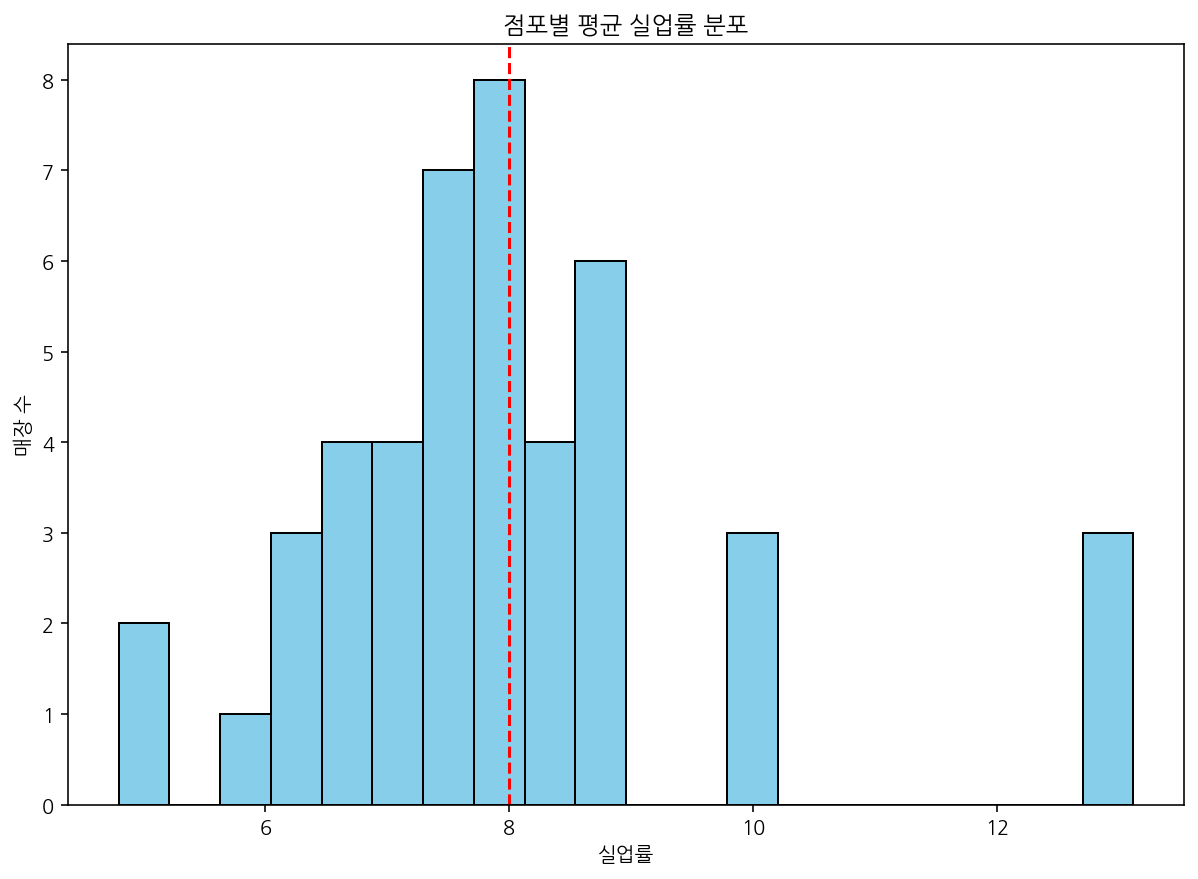

In [ ]:
# 점포별 평균 실업률 분포 시각화 - 히스토그램
store_unemp = store_sales_unemp.loc[:, '실업률'].copy()
store_unemp_hist = store_unemp.plot.hist(bins=20, figsize=(10, 7), color='skyblue', ec='black');
store_unemp_hist.set_xlabel('실업률')
store_unemp_hist.set_ylabel('매장 수')
store_unemp_hist.set_title('점포별 평균 실업률 분포')
# 수직선 : 모든 점포의 실업률 평균
store_unemp_hist.axvline(store_unemp.mean(), color='red', ls='--')
plt.show()

In [ ]:
store_unemp.mean()

7.998831390831391

In [ ]:
# 특정 매장의 주간 매출과 실업률 추이 시각화
def specific_sales_unemp(number):
    df_store = df.loc[df['매장번호'] == number, ['판매날짜', '주간매출', '실업률']]
    df_store = df_store.set_index('판매날짜')
    df_store.plot(secondary_y='실업률', title=f'{number}번 매장의 주간매출과 실업률 추이', linewidth=3, figsize=(15,7));
    return None

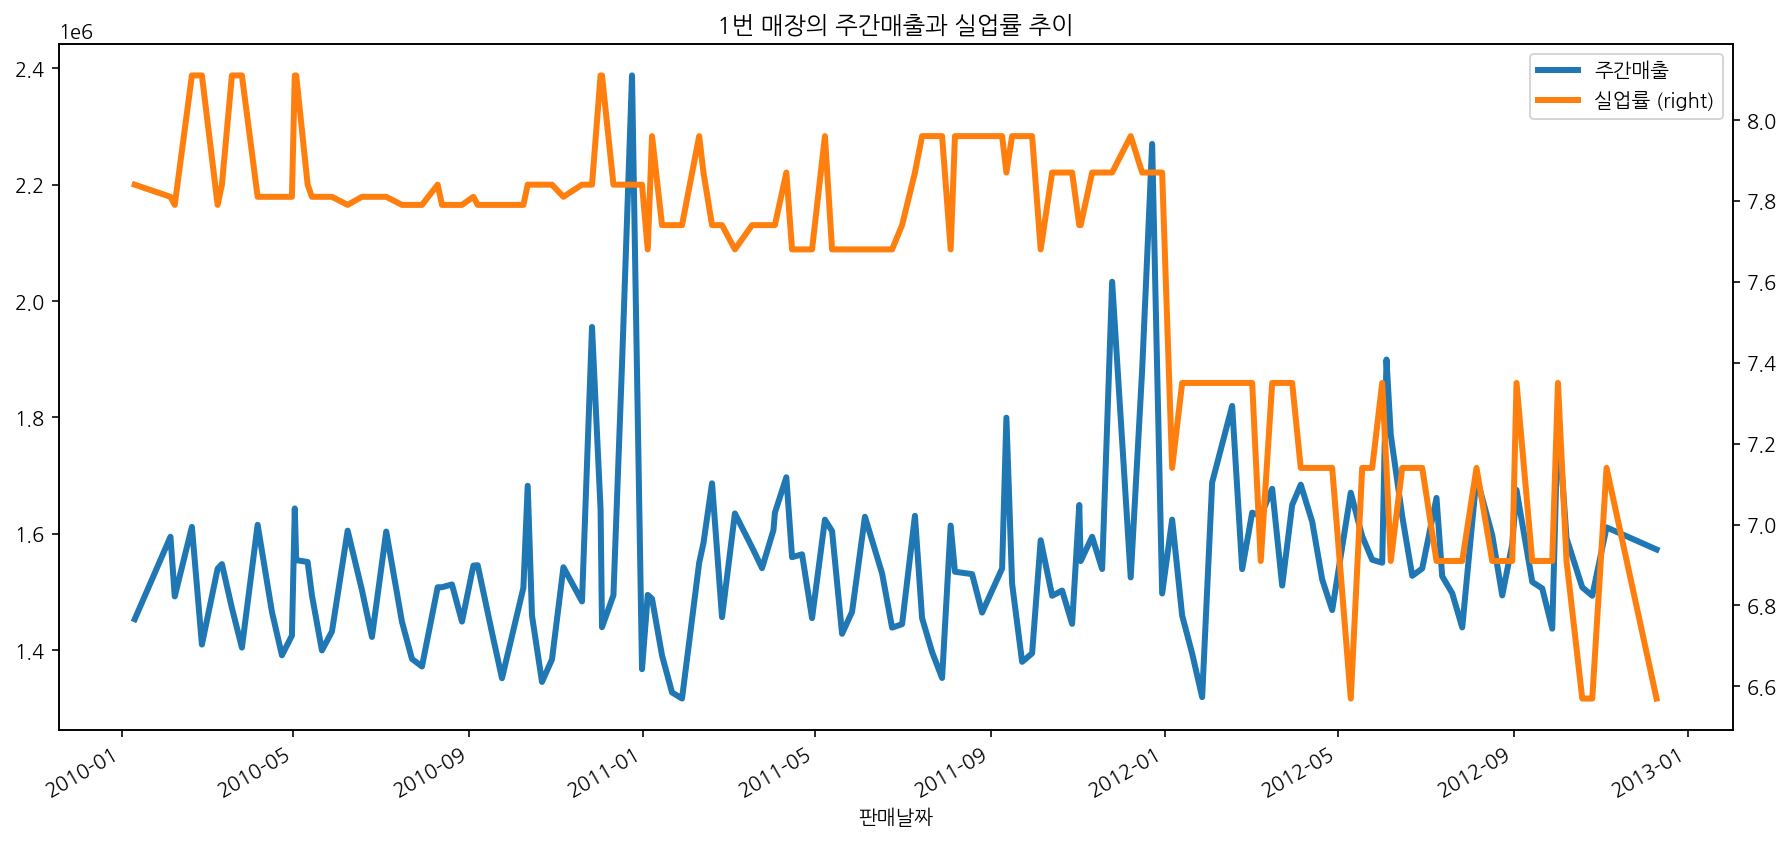

In [ ]:
# 함수 정상 작동 확인 : 1번 매장
specific_sales_unemp(1)

# 7. 날짜(기간), 실업률

### 1. 판매날짜별 실업률 비교

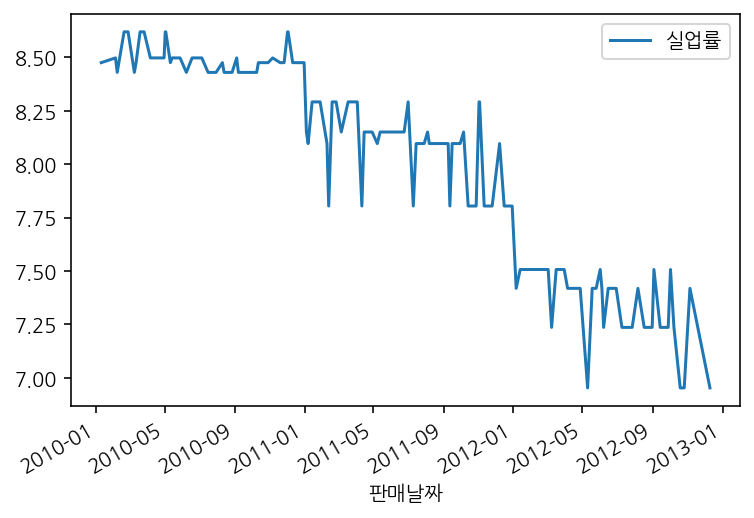

In [ ]:
pd.pivot_table(data=df, index='판매날짜', values='실업률', aggfunc='mean').plot()

### 2. 생성된 연도 파생변수로 연도별 실업률 비교

In [ ]:
pivot_year = pd.pivot_table(data=df, index='연도', values='실업률', aggfunc='mean')
pivot_year

,실업률
연도,
2010,8.492606
2011,8.081863
2012,7.347230


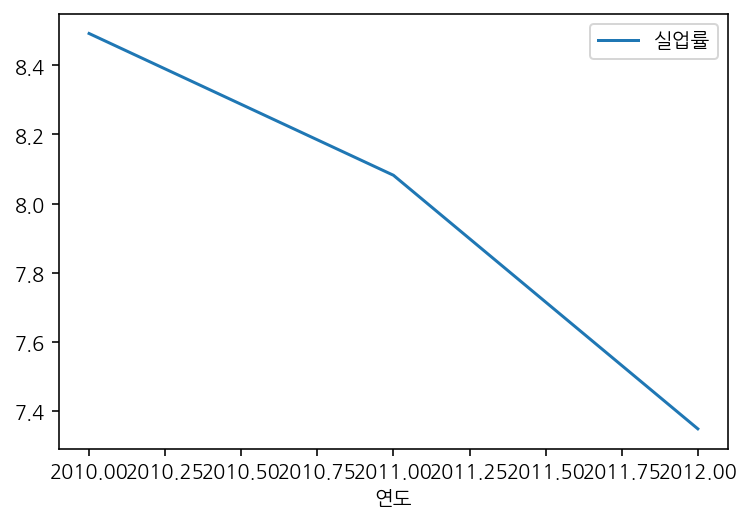

In [ ]:
pivot_year.plot()

### 3. 연도월 파생변수 생성 후 연도월별 실업률 비교

In [ ]:
df['연도월'] = df['판매날짜'].astype(str).str[:7]

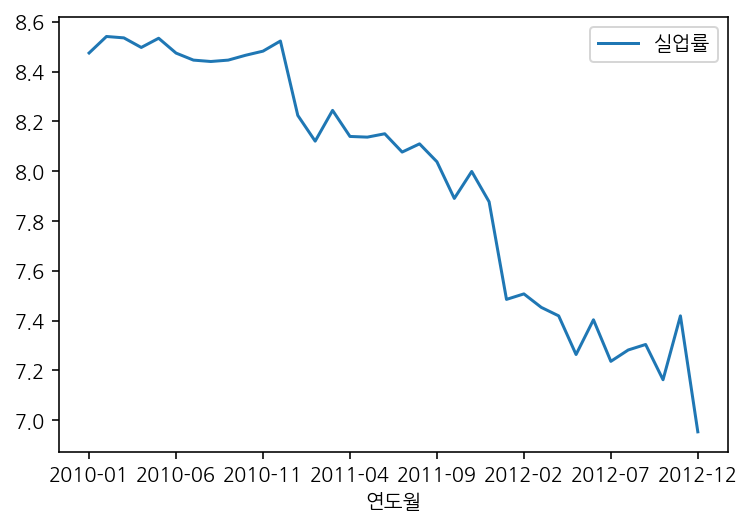

In [ ]:
pd.pivot_table(data=df, index='연도월', values='실업률', aggfunc='mean').plot()

# 8. 주간매출, 소비자물가지수(CPI)

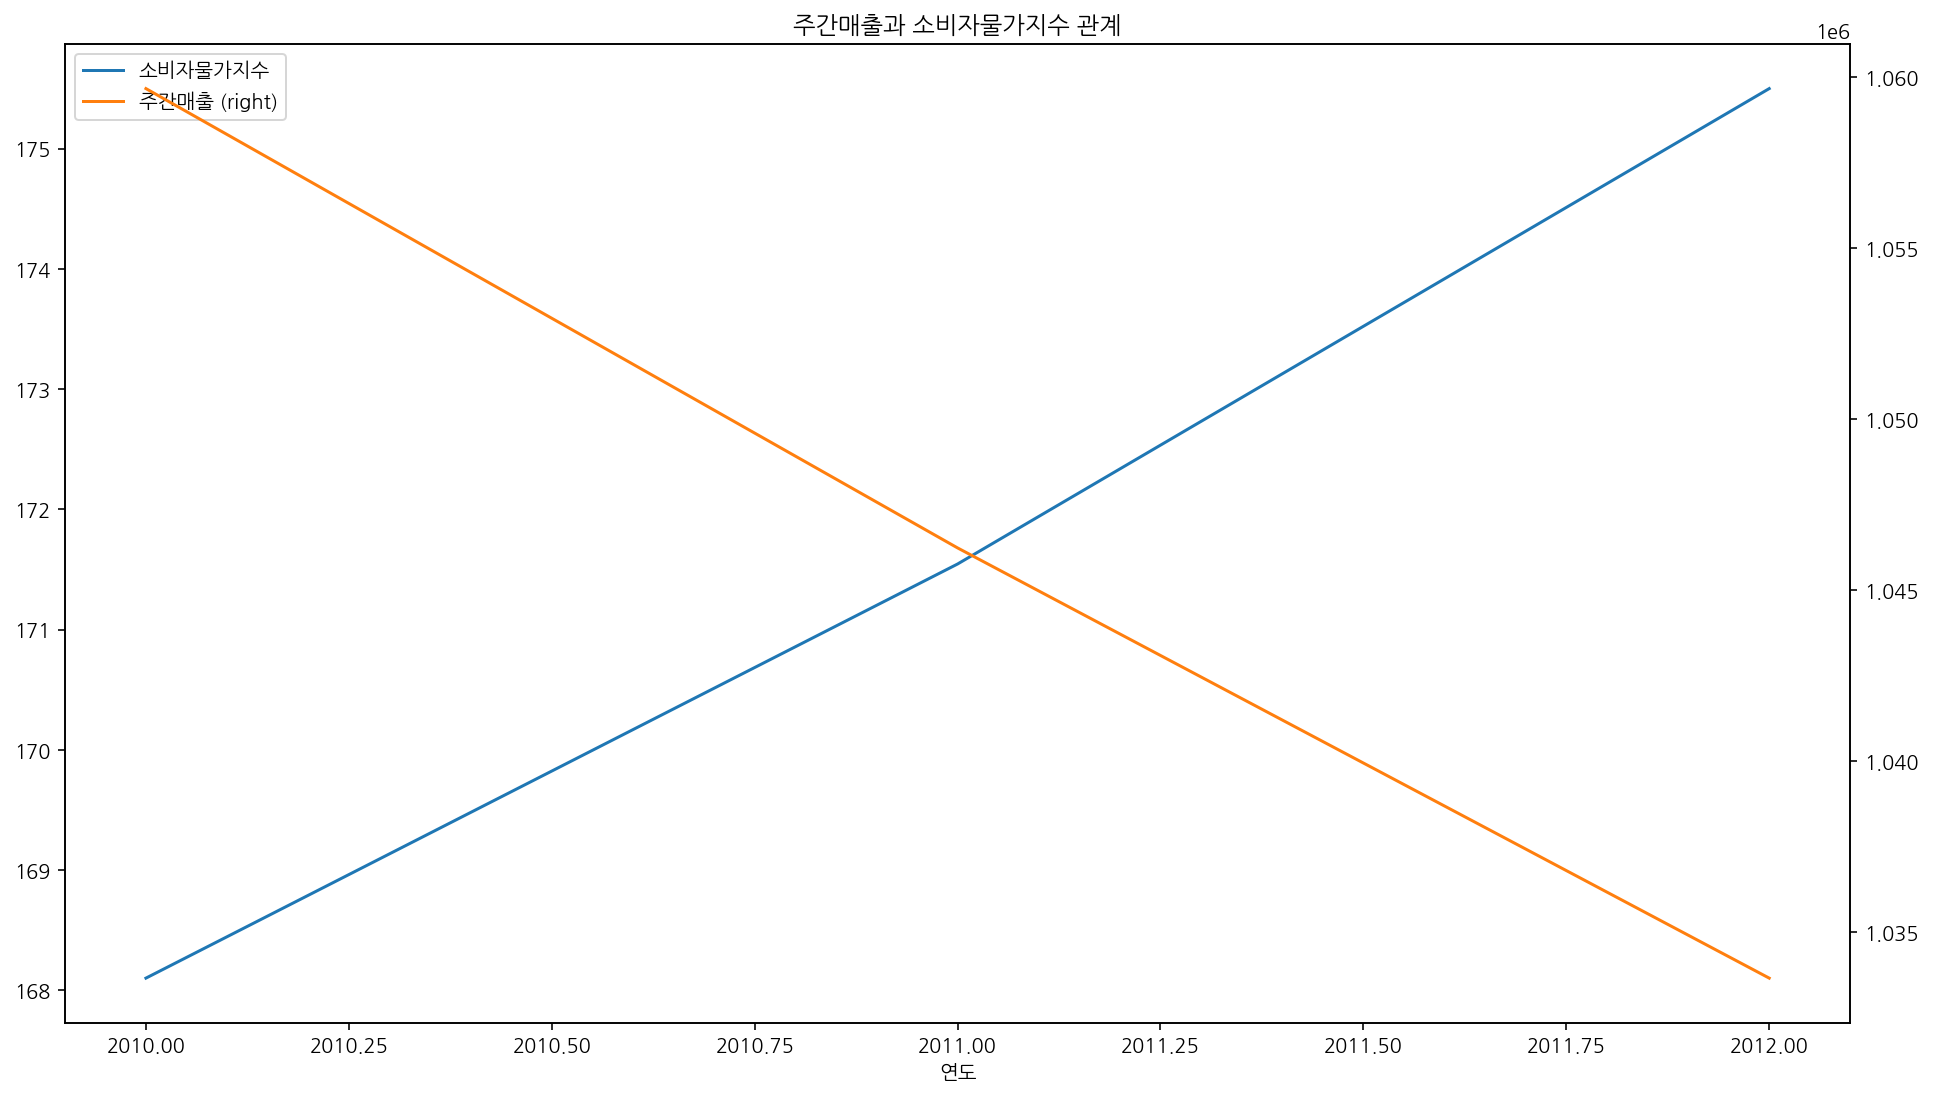

In [ ]:
df_cpi = df.groupby(by=['연도'])['소비자물가지수'].mean()
df_weeksales = df.groupby(by=['연도'])['주간매출'].mean()
df_8 = pd.DataFrame([df_cpi, df_weeksales]).T

df_8.plot(figsize=(16,9), secondary_y='주간매출', title='주간매출과 소비자물가지수 관계');

# 9. 연료비, 소비자물가지수(CPI)

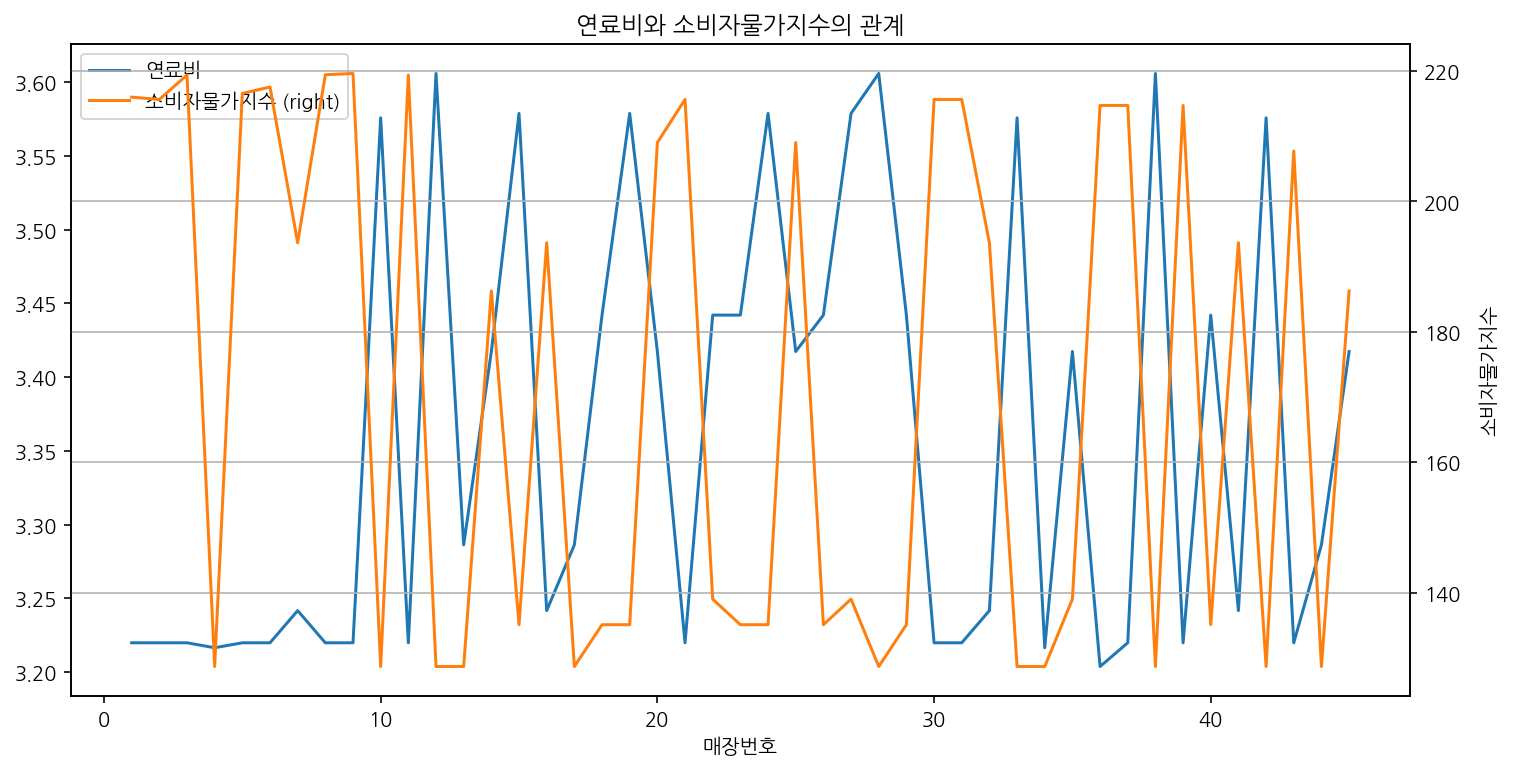

In [ ]:
'''사용한 변수
df_fuel : 매장별 연료비 평균
df_cpi : 매장별 소비자물가지수 평균
df_nine : df_fuel과 df_cpi를 합친 데이터프레임
'''

df_fuel = df.groupby('매장번호')['연료비'].mean()
df_cpi = df.groupby('매장번호')['소비자물가지수'].mean()
df_nine = pd.DataFrame([df_fuel, df_cpi]).T

df_nine.plot(secondary_y='소비자물가지수', figsize=(12,6), title = '연료비와 소비자물가지수의 관계')
plt.ylabel('소비자물가지수', labelpad=10)
plt.grid(True)

# => 연료비와 소비자물가지수는 대체로 반대로 움직임.

# 10. 실업률, 소비자물가지수(CPI)



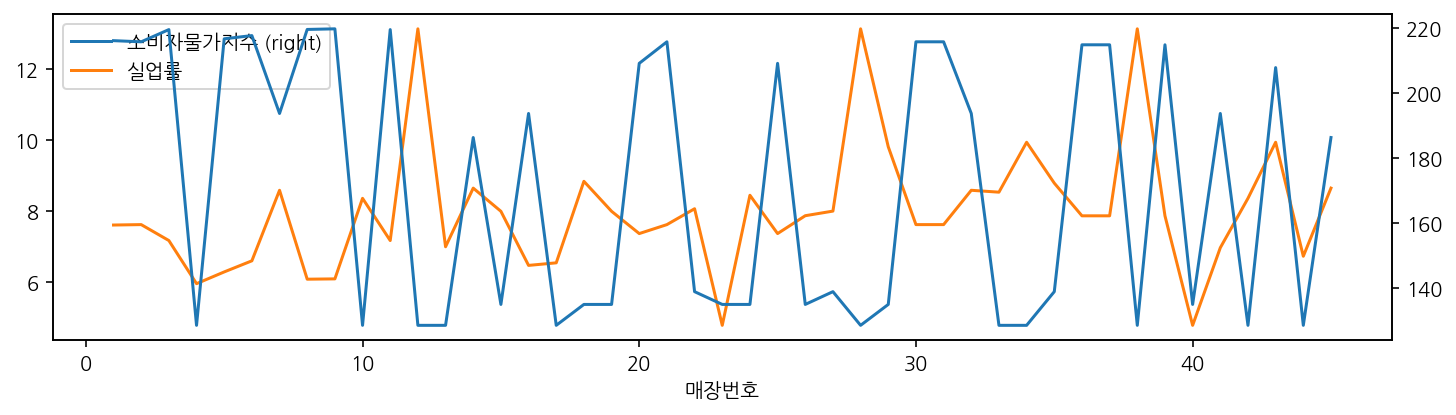

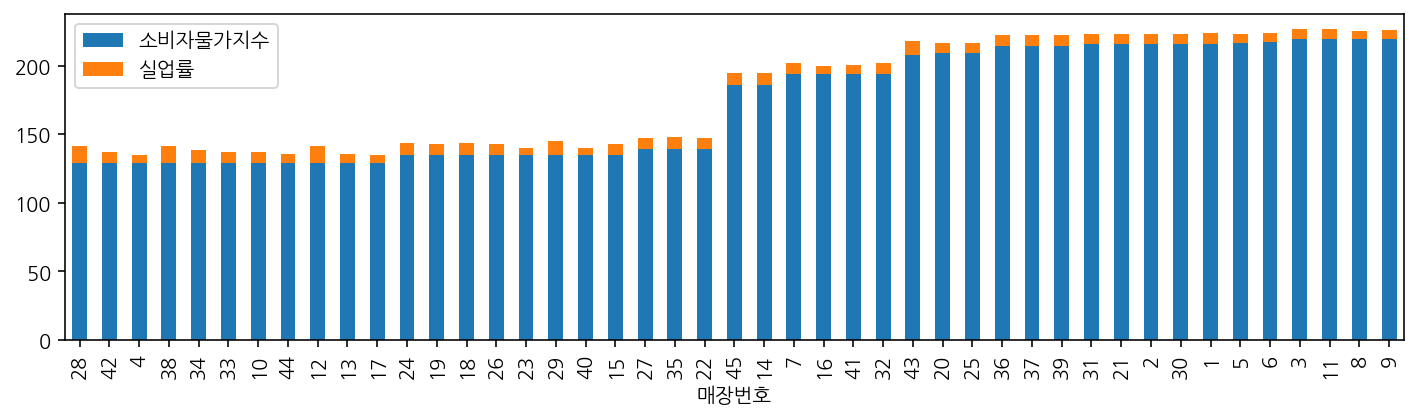

In [ ]:
df_cpi= df.groupby("매장번호")["소비자물가지수"].mean() # 매장번호를 기준으로 소비자물가지수 평균
df_unep = df.groupby("매장번호")["실업률"].mean() # 매장번호를 기준으로 실업률 평균
df_10 = pd.DataFrame([df_cpi, df_unep]).T # 데이터프레임으로 만들기


df_10.plot(figsize = (12,3), secondary_y = "소비자물가지수")
df_10.sort_values("소비자물가지수").plot(kind = "bar", figsize = (12,3), stacked = True)
# 실업률이 높은 매장은 소비자물가지수가 낮아서 서로 반대 됨. 

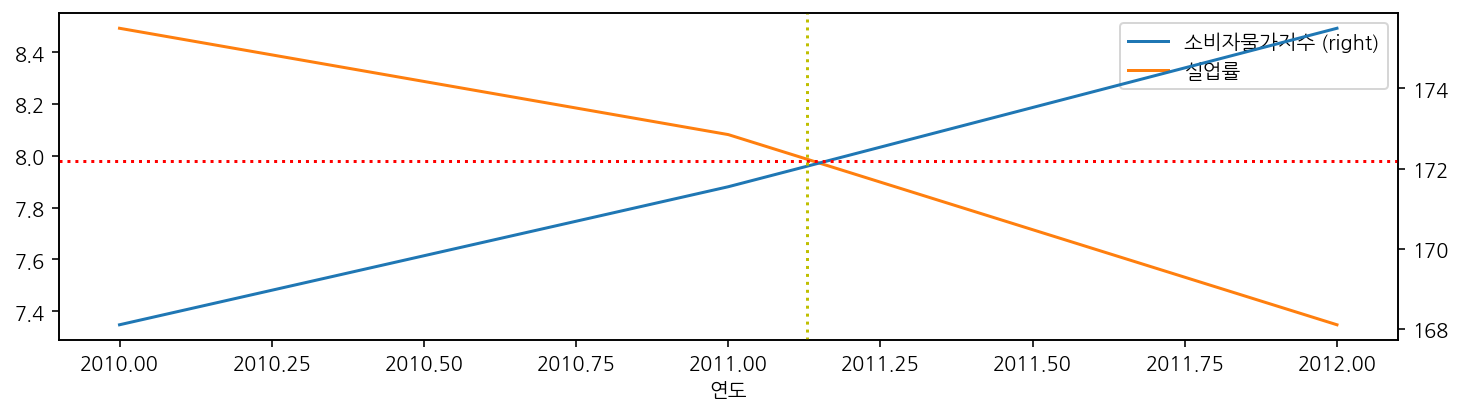

In [ ]:
# 10) 실업률, 소비자물가지수_연도를 기준
df_cpi= df.groupby("연도")["소비자물가지수"].mean() # 연도를 기준으로 소비자물가지수 평균
df_unep = df.groupby("연도")["실업률"].mean() # 연도를 기준으로 실업률 평균
df_10 = pd.DataFrame([df_cpi, df_unep]).T # 데이터프레임으로 만들기

df_10.plot(figsize = (12,3), secondary_y = "소비자물가지수")
plt.axhline(172.2, c="r", ls=":")
plt.axvline(2011.13, c="y", ls=":")

신기해서 찾아봤더니 실업률과 소비자물가지수는 역의 관계가 있다고 합니다. 사진을 첨부하려고 했는데 안되어 링크 첨부하겠습니다!
https://eiec.kdi.re.kr/material/clickView.do?click_yymm=201512&cidx=1093

그리고 왜 실업률이 하락했는지 찾아봤더니 금융 위기로 2009년 실업률 10%를 기록하고 이후 구직 포기 및 인구 고령화 등으로 경제활동인구 자체가 줄어들면서 실업자수도 감소하게 되었다고 합니다. 특히, 베이비부머세대 은퇴의 영향이 크게 나타났다고 합니다.

http://www.kif.re.kr/KMFileDir/129812019960878569_21-19-s3.pdf

# 11. 매출, 온도

In [ ]:
store_sales_tmp = df.groupby('매장번호')[['주간매출','기온']].mean()
store_sales_tmp.sample(5)

,주간매출,기온
매장번호,,
18,1.084718e+06,11.872867
35,9.197250e+05,14.061469
26,1.002912e+06,6.476573
42,5.564039e+05,22.356713
6,1.564728e+06,20.944406


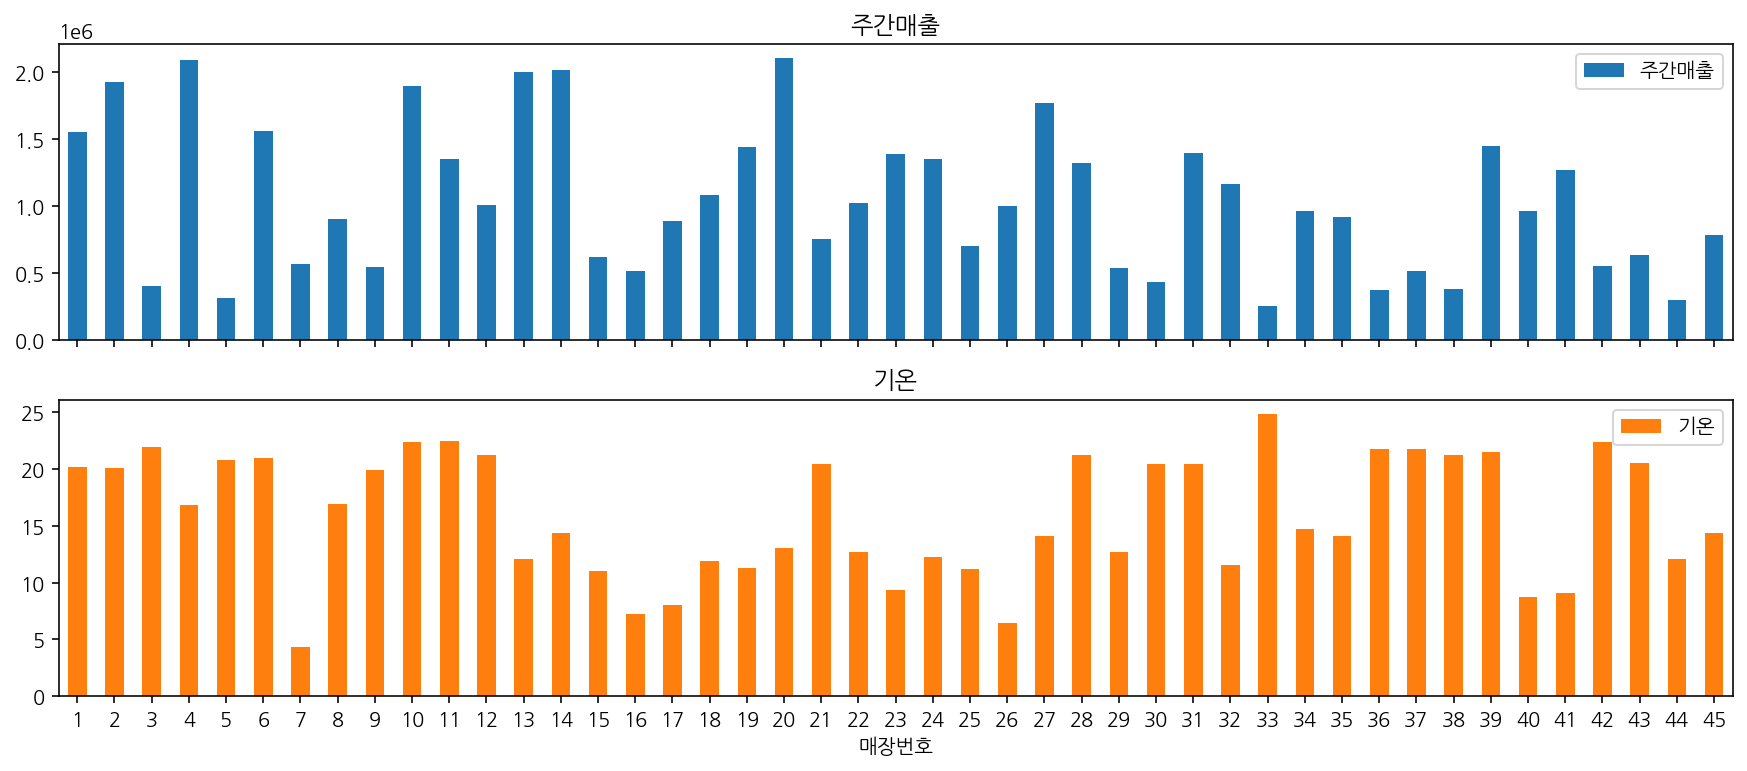

In [ ]:
# 점포별 평균 주간매출과 평균 기온 시각화 - subplot 사용
store_sales_tmp.plot(kind='bar', figsize=(15,6), subplots='기온', rot=0);

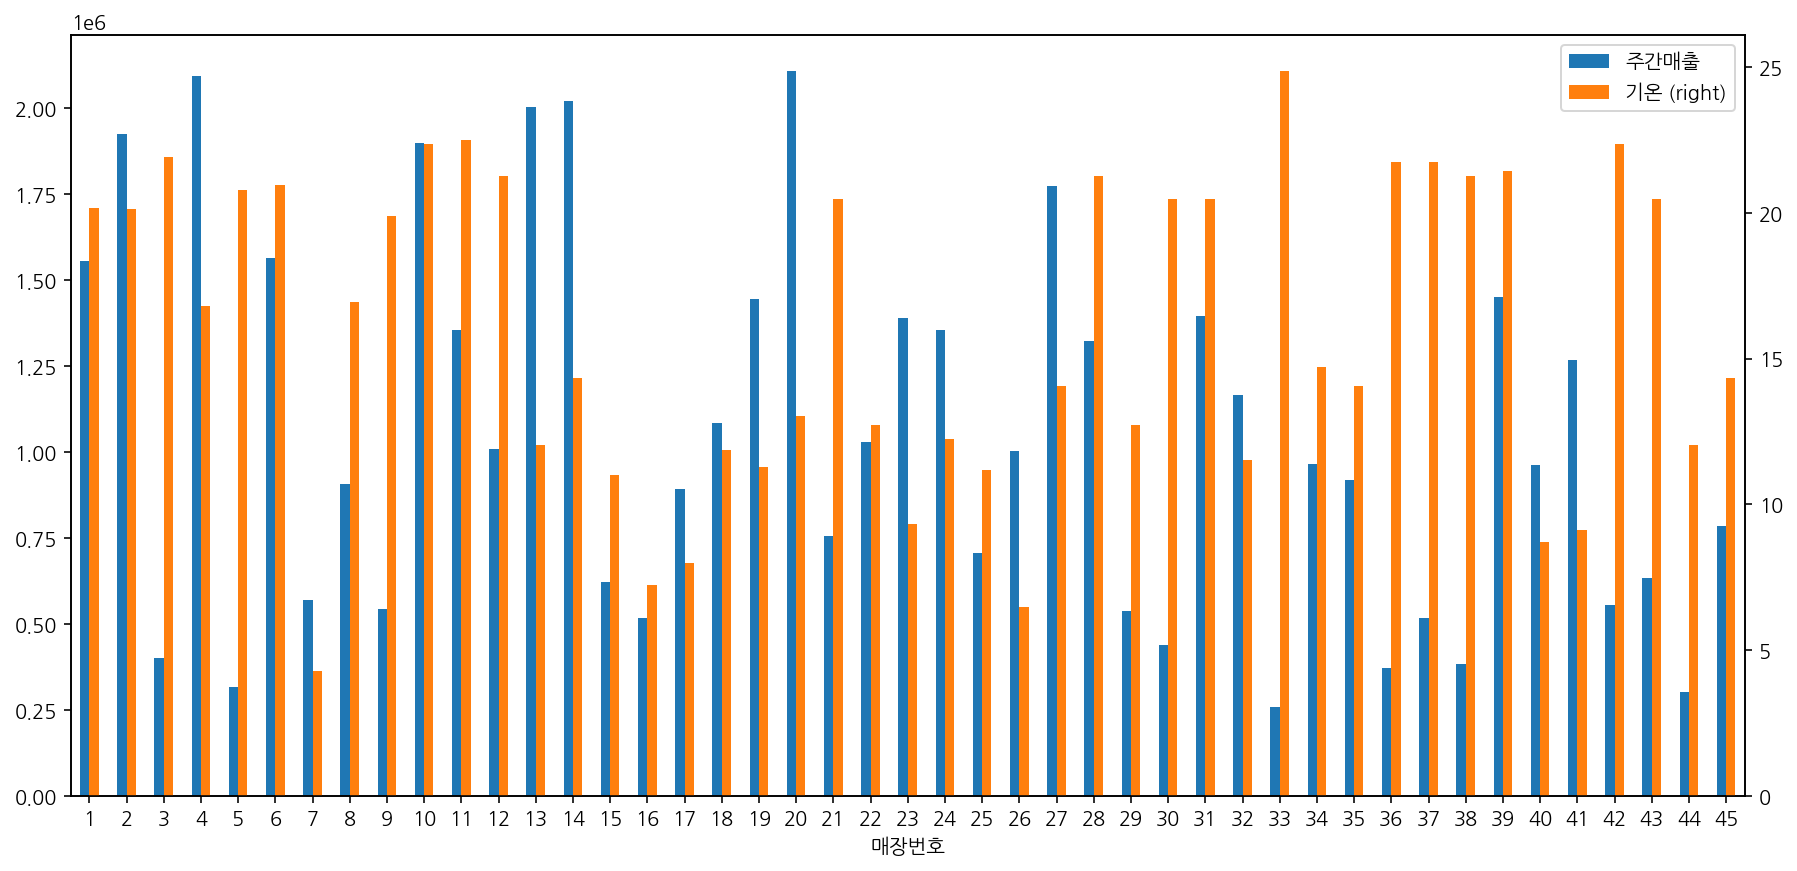

In [ ]:
# 점포별 평균 주간매출과 평균 기온 시각화 - 2축 그래프 사용
store_sales_tmp.plot(kind='bar', figsize=(15,7), secondary_y='기온', rot=0);

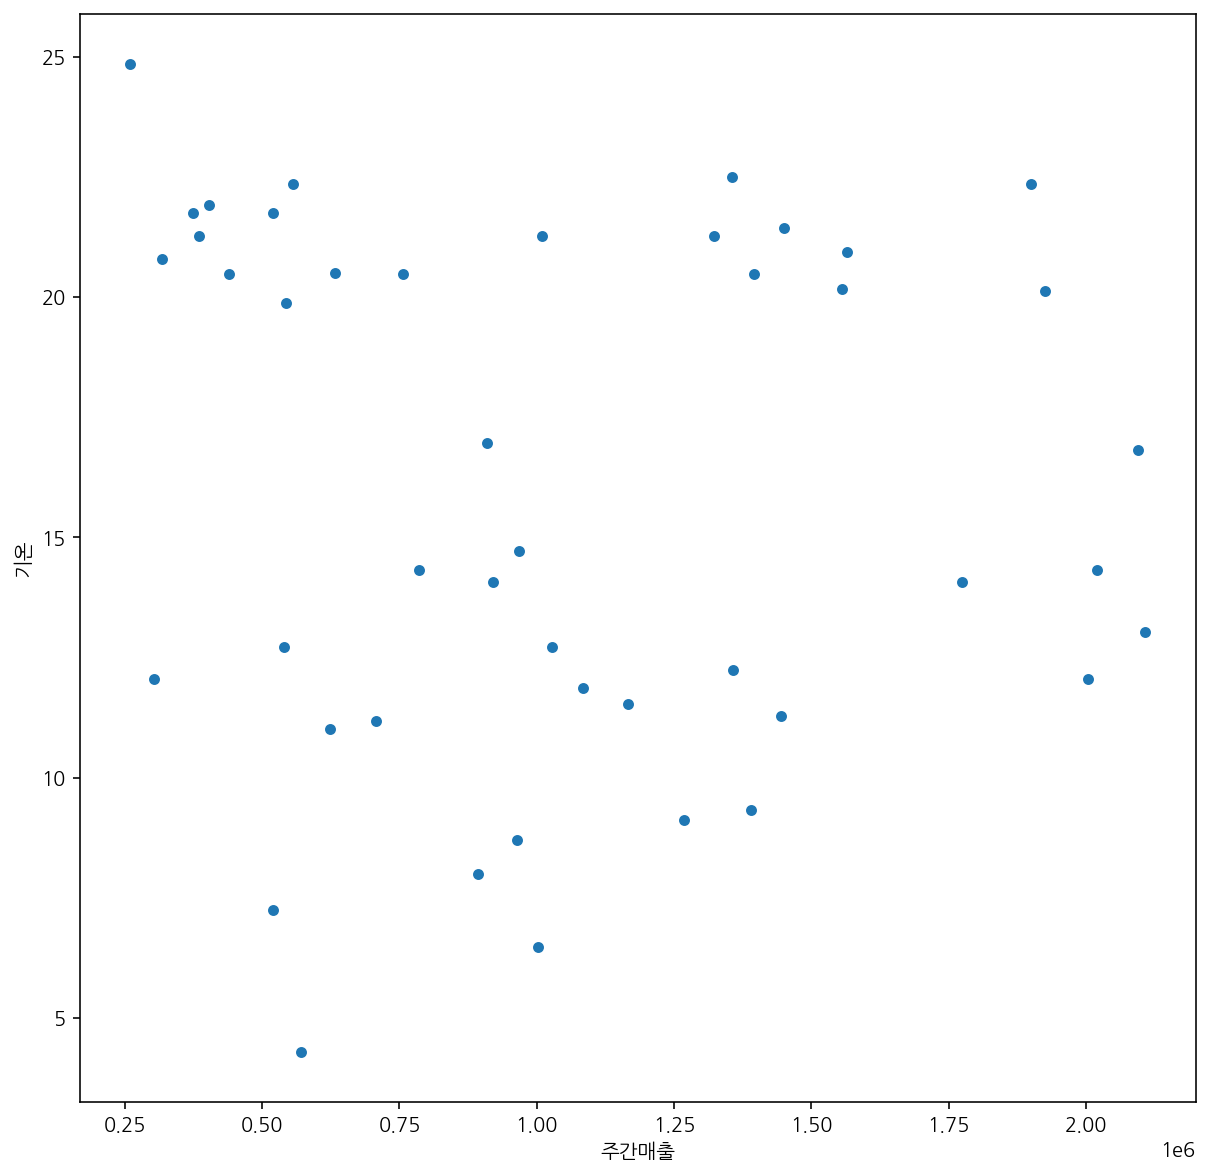

In [ ]:
# 점포별 평균 주간매출과 평균 기온 scatter plot 확인
# 두 값 사이에 상관관계를 확인할 수 없다
store_sales_tmp.plot(kind='scatter', x='주간매출', y='기온', figsize=(10,10), rot=0);

In [ ]:
store_sales_tmp.corr()

,주간매출,기온
주간매출,1.000000,-0.076387
기온,-0.076387,1.000000


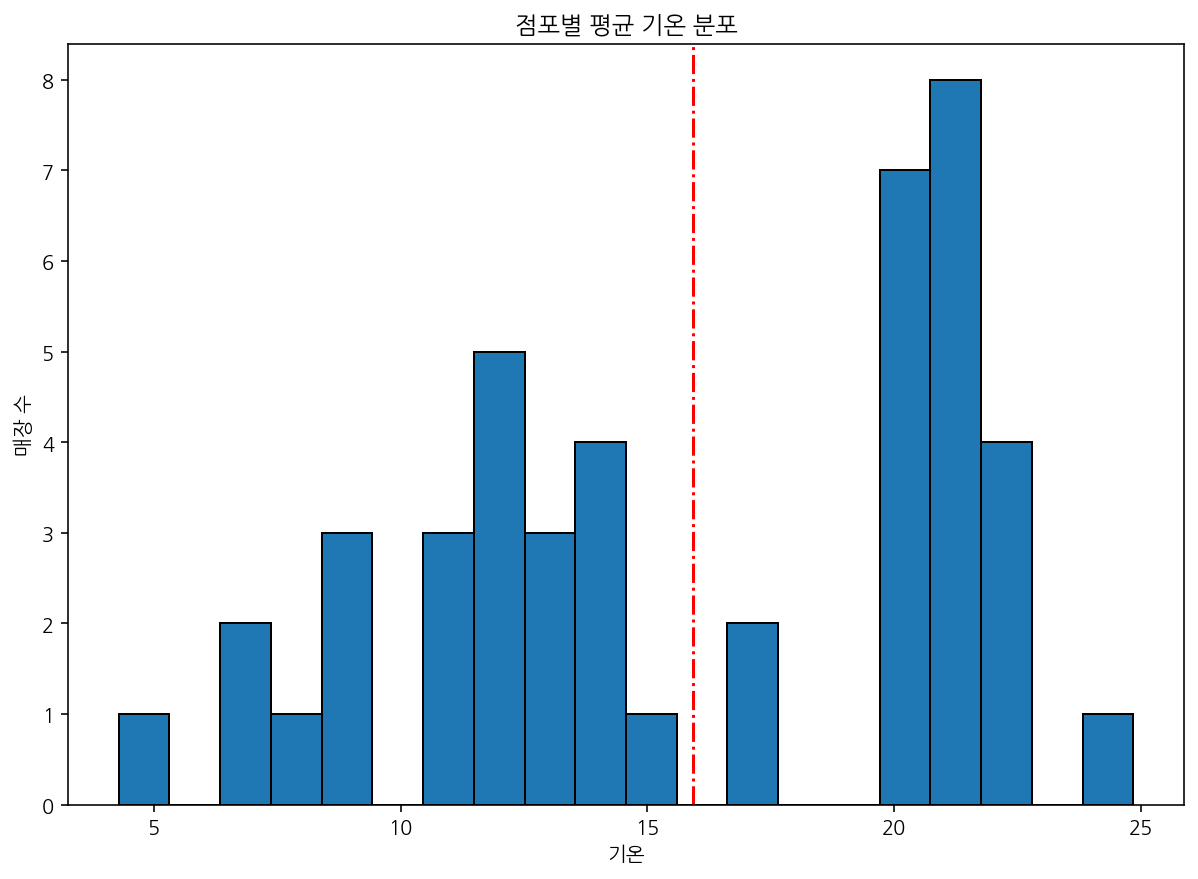

In [ ]:
# 점포별 평균 기온 분포 시각화 - 히스토그램
store_tmp = store_sales_tmp.loc[:, '기온'].copy()
store_tmp_hist = store_tmp.plot.hist(bins=20, figsize=(10, 7), ec='black')
store_tmp_hist.set_xlabel('기온')
store_tmp_hist.set_ylabel('매장 수')
store_tmp_hist.set_title('점포별 평균 기온 분포')
# 수직선 : 모든 점포의 기온 평균
store_tmp_hist.axvline(store_tmp.mean(), color='red', ls='-.')
plt.show()

In [ ]:
store_tmp.mean()

15.924331002331002

In [ ]:
# 특정 매장의 주간 매출과 기온 추이 시각화
def specific_sales_tmp(number):
    df_store = df.loc[df['매장번호'] == number, ['판매날짜', '주간매출', '기온']]
    df_store = df_store.set_index('판매날짜')
    df_store.plot(secondary_y='기온', title=f'{number}번 매장의 주간매출과 기온 추이', linewidth=3, figsize=(15,7));
    return None

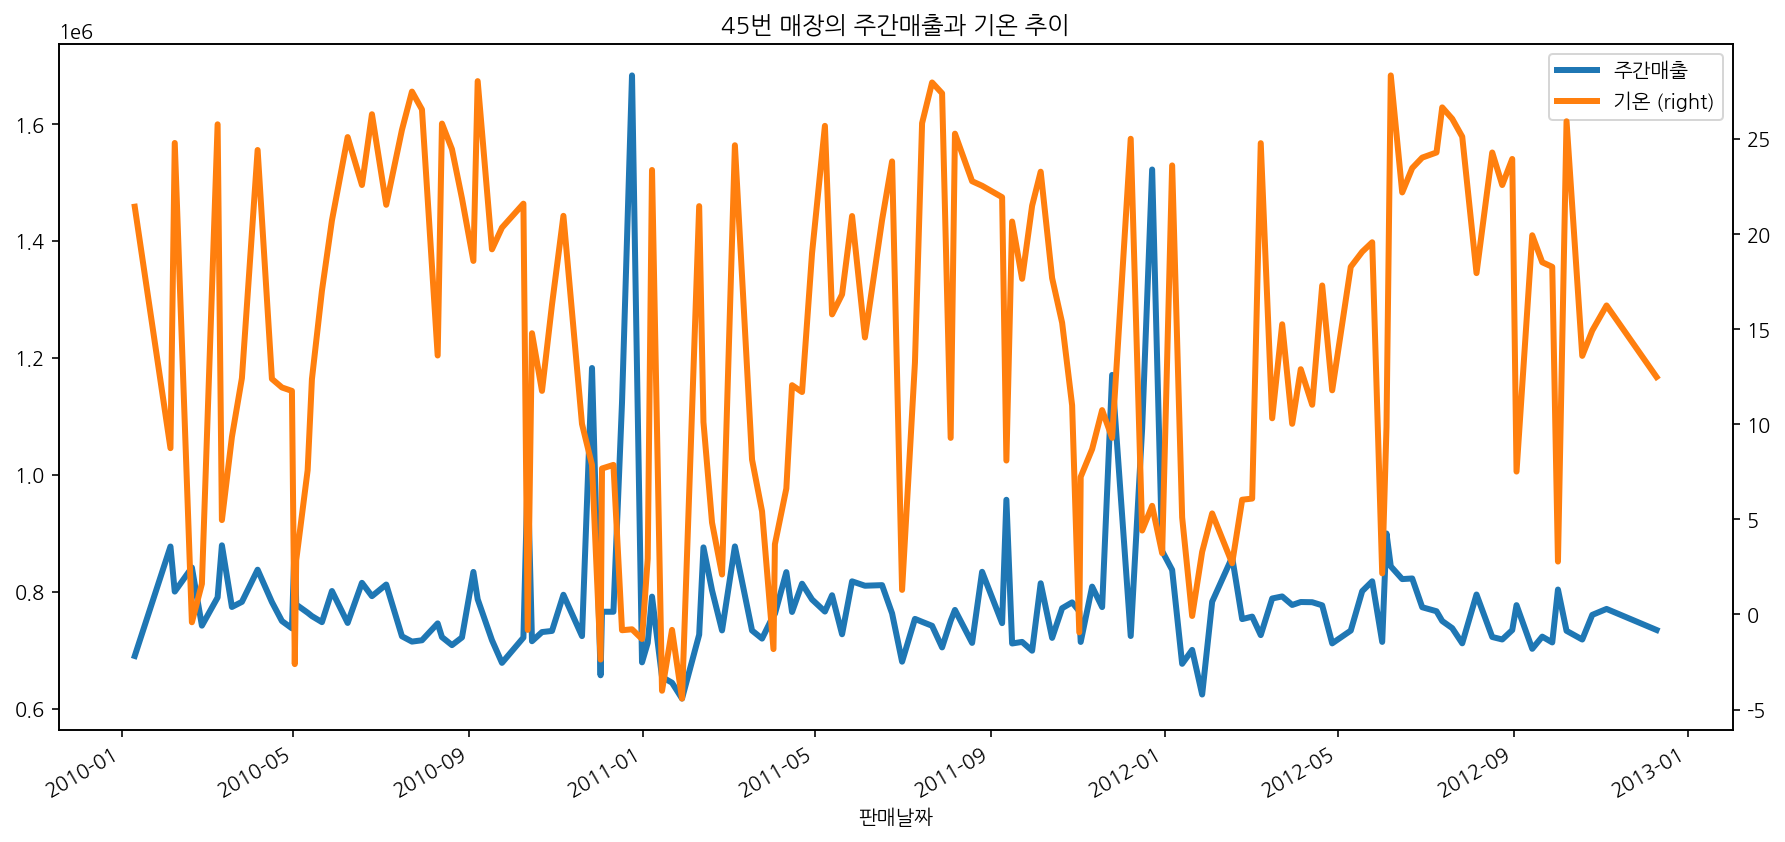

In [ ]:
# 함수 정상 작동 확인 : 45번 매장
specific_sales_tmp(45)

# 12. 월마트 전체 매장의 2010~2012 매출액 증가율 분석

In [ ]:
# 2010년도 전체 매장 매출액 df_2010_sum
df_2010_sum = df.loc[df["연도"]==2010]
df_2010_sum = sum(df_2010_sum["주간매출"])
df_2010_sum
# 2011년도 전체 매장 매출액 df_2011_sum
df_2011_sum = df.loc[df["연도"]==2011]
df_2011_sum = sum(df_2011_sum["주간매출"])
df_2011_sum
# 2012년도 전체 매장 매출액 df_2012_sum
df_2012_sum = df.loc[df["연도"]==2012]
df_2012_sum = sum(df_2012_sum["주간매출"])
df_2012_sum

# 소수 2자리 표기.
df_2010_sum = round(df_2010_sum, 2)
df_2011_sum = round(df_2011_sum, 2)
df_2012_sum = round(df_2012_sum, 2)

# 연도 별 월마트 총 매출액 현황(2010~2012)
display(df_2010_sum)
display(df_2011_sum)
display(df_2012_sum)

2288886120.41

2448200007.35

2000132859.35

In [ ]:
# 증감율 계산
df_walmart_2010 = 1     # 기준년도 = 1 처리
df_walmart_2011 = (df_2011_sum - df_2010_sum) / df_2010_sum * 100
df_walmart_2012 = (df_2012_sum - df_2011_sum) / df_2011_sum * 100

In [ ]:
# Dataframe 생성
df_walmart_sum = pd.DataFrame({"연도" : [2010, 2011, 2012], "매출액" : [df_2010_sum, df_2011_sum, df_2012_sum], "증감율" : [df_walmart_2010, df_walmart_2011, df_walmart_2012]})
df_walmart_sum = df_walmart_sum.set_index("연도")
df_walmart_sum

,매출액,증감율
연도,,
2010,2.288886e+09,1.000000
2011,2.448200e+09,6.960324
2012,2.000133e+09,-18.301901


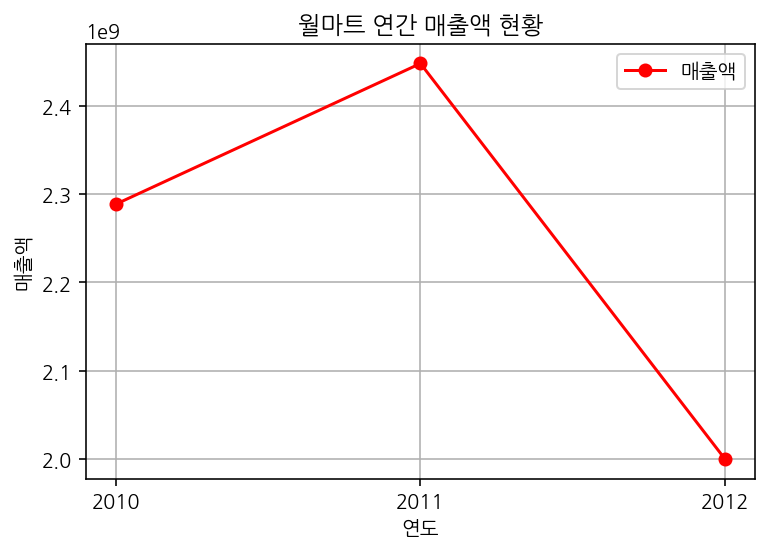

In [ ]:
# 3개년도 매출액 비교
plt.plot(['2010', '2011', '2012'], [df_2010_sum, df_2011_sum, df_2012_sum], 'ro-', label='매출액')
plt.xlabel('연도')
plt.ylabel('매출액')
plt.grid(True)
plt.title('월마트 연간 매출액 현황')
plt.legend()

plt.show()

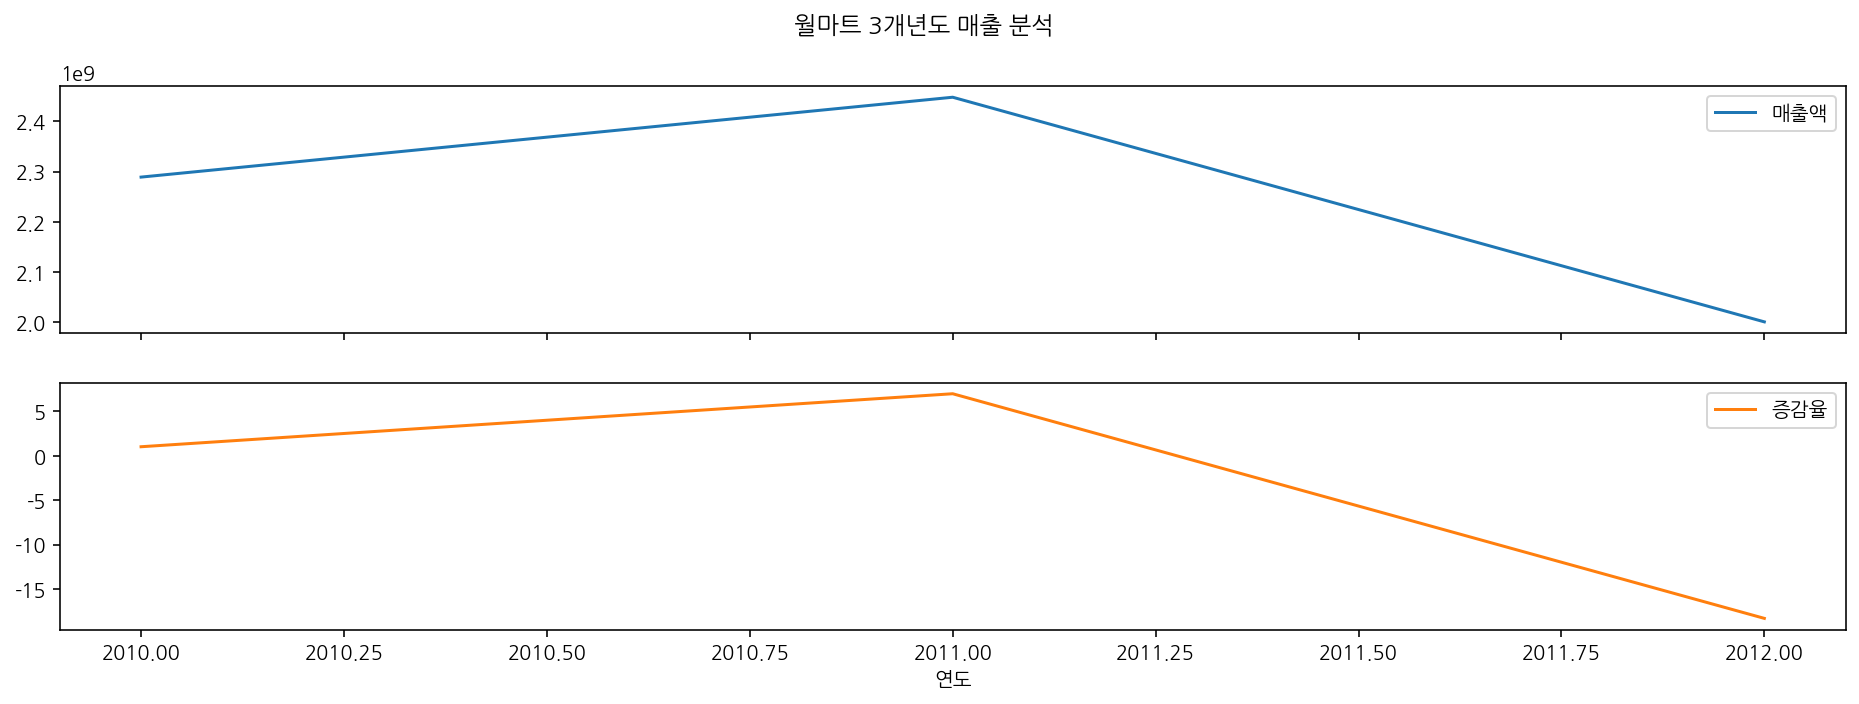

In [ ]:
df_walmart_sum.plot(kind="line", figsize=(16,5), title="월마트 3개년도 매출 분석", subplots=True);